## Imports:

In [1]:
import scipy.io
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plt_lab
import matplotlib.gridspec as gridspec
import obspy
import pandas as pd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load data:
We are going to use this data to plot spectograms of SCG signals. 

In [3]:
dir_path = "/Users/ecem/Documents/GitHub/seismocardiogram/data/diseased-dataset/Raw_Recordings"

In [4]:
x = np.load(dir_path + "/tr_x.npy", allow_pickle= True)
y = np.load(dir_path + "/tr_z.npy", allow_pickle= True)
z = np.load(dir_path + "/tr_y.npy", allow_pickle= True)

## Load csv and create two seperate dataframe:
We are going to use heart dataframe to differentiate healty people from the people with diaseaes. Data's of healty people will be stored in the healty dataset while diseased people will be in diseased dataset.

In [5]:
heart = pd.read_excel("/Users/ecem/Documents/GitHub/seismocardiogram/data/diseased-dataset/Summary_Pub_Deidentified.xlsx")
df = heart.copy().fillna(0)

I have dropped some columns because they didnt have much information. ????????

In [6]:
df.drop(["Mitral valve Peak velocity (m/sec)",
         "Mitral valve Mean gradient(mmHg)", 
         "Echo available",
        "Date of collection",
        "Date of echo"], 
        inplace = True, axis = 1)
df.drop(df.tail(1).index,inplace=True)

In [7]:
idx_MS = np.where((df['Moderate or greater MS'] == 1.0)  
                  &(df['Moderate or greater MR'] == 0.0)  
                  & (df['Moderate or greater AR'] == 0.0)
                  &(df['Moderate or greater AS'] == 0.0)  
                  & (df['moderate or greater TR'] == 0.0))

In [8]:
idx_MS

(array([ 8, 28, 62]),)

In [9]:
diseased_MS = df.loc[idx_MS]

In [10]:
idx_MR = np.where((df['Moderate or greater MS'] == 0.0)  
                  &(df['Moderate or greater MR'] == 1.0)  
                  & (df['Moderate or greater AR'] == 0.0)
                  &(df['Moderate or greater AS'] == 0.0)  
                  & (df['moderate or greater TR'] == 0.0))

In [11]:
idx_MR

(array([ 0,  2, 12, 19, 27, 31, 32, 37, 45, 50, 54, 60, 65]),)

In [12]:
diseased_MR = df.loc[idx_MR]

In [13]:
idx_AR = np.where((df['Moderate or greater MS'] == 0.0)  
                  &(df['Moderate or greater MR'] == 0.0)  
                  & (df['Moderate or greater AR'] == 1.0)
                  &(df['Moderate or greater AS'] == 0.0)  
                  & (df['moderate or greater TR'] == 0.0))

In [14]:
idx_AR

(array([17, 21, 26, 39, 68]),)

In [15]:
diseased_AR = df.loc[idx_AR]

In [16]:
idx_AS = np.where((df['Moderate or greater MS'] == 0.0)  
                  &(df['Moderate or greater MR'] == 0.0)  
                  & (df['Moderate or greater AR'] == 0.0)
                  &(df['Moderate or greater AS'] == 1.0)  
                  & (df['moderate or greater TR'] == 0.0))

In [17]:
idx_AS

(array([44, 71, 73, 76, 78, 80, 84, 85, 87, 88, 92, 95, 96, 97, 98, 99]),)

In [18]:
diseased_AS = df.loc[idx_AS]

In [19]:
idx_TR = np.where((df['Moderate or greater MS'] == 0.0)  
                  &(df['Moderate or greater MR'] == 0.0)  
                  & (df['Moderate or greater AR'] == 0.0)
                  &(df['Moderate or greater AS'] == 0.0)  
                  & (df['moderate or greater TR'] == 1.0))

In [20]:
idx_TR

(array([], dtype=int64),)

Now its a time to seperate their waveform too.

These empty list will be used to store array values.

In [21]:
MS_x, MS_y, MS_z = [],[],[]
MR_x, MR_y, MR_z = [],[],[]
AR_x, AR_y, AR_z = [],[],[]
AS_x, AS_y, AS_z = [],[],[]

In [22]:
for i in range(len(diseased_MS['Patient ID'].index)):
    x_ = x[diseased_MS['Patient ID'].index[i]]
    y_ = y[diseased_MS['Patient ID'].index[i]]
    z_ = z[diseased_MS['Patient ID'].index[i]]
    
    MS_x.append(x_)
    MS_y.append(y_) 
    MS_z.append(z_) 

In [23]:
for i in range(len(diseased_MR['Patient ID'].index)):
    x_ = x[diseased_MR['Patient ID'].index[i]]
    y_ = y[diseased_MR['Patient ID'].index[i]]
    z_ = z[diseased_MR['Patient ID'].index[i]]
    
    MR_x.append(x_)
    MR_y.append(y_) 
    MR_z.append(z_) 

In [24]:
for i in range(len(diseased_AR['Patient ID'].index)):
    x_ = x[diseased_AR['Patient ID'].index[i]]
    y_ = y[diseased_AR['Patient ID'].index[i]]
    z_ = z[diseased_AR['Patient ID'].index[i]]
    
    AR_x.append(x_)
    AR_y.append(y_) 
    AR_z.append(z_) 

In [25]:
for i in range(len(diseased_AS['Patient ID'].index)):
    x_ = x[diseased_AS['Patient ID'].index[i]-1]
    y_ = y[diseased_AS['Patient ID'].index[i]-1]
    z_ = z[diseased_AS['Patient ID'].index[i]-1]
    
    AS_x.append(x_)
    AS_y.append(y_) 
    AS_z.append(z_) 

In [26]:
stacked_MS = np.stack((MS_x,MS_y, MS_z),axis = -1)
stacked_MR = np.stack((MR_x,MR_y, MR_z),axis = -1)
stacked_AS = np.stack((AS_x,AS_y, AS_z),axis = -1)
stacked_AR = np.stack((AR_x,AR_y, AR_z),axis = -1)

In [27]:
stacked_MR.shape

(13, 3)

In [28]:
np.save(dir_path + "/MS", stacked_MS, allow_pickle= True)
np.save(dir_path + "/MR", stacked_MR, allow_pickle= True)
np.save(dir_path + "/AS", stacked_AS, allow_pickle= True)
np.save(dir_path + "/AR", stacked_AR, allow_pickle= True)


## comparison of two dataset:

Now we will to try visualize spectograms. So far we have used Obspy to visualize SCG signals. However, with obspy we are not able to plot spectograms side by side. This is important for us because we want to see spectograms of x,y and z components simultaneously for both healty and diseased people. So, from now on I will refer to those plots, for 3 components of healty and diseased (in total six plot, as "PAIR".


I have mentioned that Obpsy has a problem in side by side plotting. So I changed it source code. I have added and deleted some part to operate according to my need. ???????????

Thats why from now on we are going to use **output_spectogram** function to get values needed to plot spectogram.

These are the imports for output_spectogram function to work.

In [28]:
from obspy.imaging.cm import obspy_sequential
import math
from matplotlib import mlab
from matplotlib.colors import Normalize

In [29]:
def _nearest_pow_2(x):
    a = math.pow(2, math.ceil(np.log2(x)))
    b = math.pow(2, math.floor(np.log2(x)))
    if abs(a - x) < abs(b - x):
        return a
    else:
        return b

In [30]:
def output_spectrogram(data, samp_rate, per_lap=0.9, wlen=None, log=False,
                outfile=None, fmt=None, axes=None, dbscale=False,
                mult=8.0, cmap=obspy_sequential, zorder=None, title=None,
                show=True, clip=[0.0, 1.0]):
 
    import matplotlib.pyplot as plt
    
    # enforce float for samp_rate
    samp_rate = float(samp_rate)

    # set wlen from samp_rate if not specified otherwise
    if not wlen:
        wlen = samp_rate / 100.

    npts = len(data)
    # nfft needs to be an integer, otherwise a deprecation will be raised
    # XXX add condition for too many windows => calculation takes for ever
    nfft = int(_nearest_pow_2(wlen * samp_rate))
    if nfft > npts:
        nfft = int(_nearest_pow_2(npts / 8.0))

    if mult is not None:
        mult = int(_nearest_pow_2(mult))
        mult = mult * nfft
    nlap = int(nfft * float(per_lap))

    data = data - data.mean()
    end = npts / samp_rate

    # Here we call not plt.specgram as this already produces a plot
    # matplotlib.mlab.specgram should be faster as it computes only the
    # arrays
    # XXX mlab.specgram uses fft, would be better and faster use rfft
    specgram, freq, time = mlab.specgram(data, Fs=samp_rate, NFFT=nfft,
                                         pad_to=mult, noverlap=nlap)
    # db scale and remove zero/offset for amplitude
    if dbscale:
        specgram = 10 * np.log10(specgram[1:, :])
    else:
        specgram = np.sqrt(specgram[1:, :])
    freq = freq[1:]
    
    vmin, vmax = clip
    if vmin < 0 or vmax > 1 or vmin >= vmax:
        msg = "Invalid parameters for clip option."
        raise ValueError(msg)
    _range = float(specgram.max() - specgram.min())
    vmin = specgram.min() + vmin * _range
    vmax = specgram.min() + vmax * _range
    norm = Normalize(vmin, vmax, clip=True)

    # calculate half bin width
    halfbin_time = (time[1] - time[0]) / 2.0
    halfbin_freq = (freq[1] - freq[0]) / 2.0

    # argument None is not allowed for kwargs on matplotlib python 3.3
    kwargs = {k: v for k, v in (('cmap', cmap), ('zorder', zorder))
              if v is not None}

    if log:
        # pcolor expects one bin more at the right end
        freq = np.concatenate((freq, [freq[-1] + 2 * halfbin_freq]))
        time = np.concatenate((time, [time[-1] + 2 * halfbin_time]))
        # center bin
        time -= halfbin_time
        freq -= halfbin_freq
        # Log scaling for frequency values (y-axis)
        ax.set_yscale('log')
        # Plot times
        ax.pcolormesh(time, freq, specgram, norm=norm, **kwargs)
    else:
        # this method is much much faster!
        specgram = np.flipud(specgram)
        # center bin
        extent = (time[0] - halfbin_time, time[-1] + halfbin_time,
                  freq[0] - halfbin_freq, freq[-1] + halfbin_freq)
    return [specgram, extent, end]

    



### sanity check

Here, we see two spectogram of the same data. First from my function while the second is from obspy. We see that they are the same.

In [31]:
spectogram, extent, end = output_spectrogram(x[0].data, x[0].stats.sampling_rate)

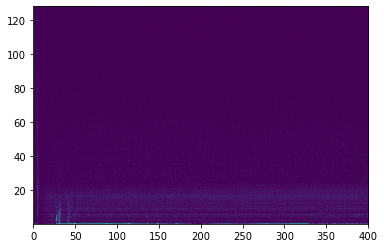

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(spectogram, interpolation="nearest", extent=extent)
ax.axis('tight')
ax.set_xlim(0,400)
ax.grid(False)

In [33]:
x[0].stats.npts / x[0].stats.sampling_rate

487.64453125

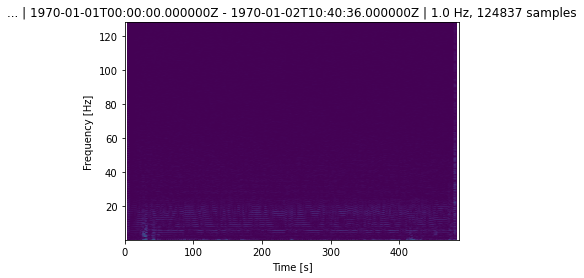

In [35]:
 obspy.core.trace.Trace(np.array(x[0])).spectrogram(wlen = 10, samp_rate = x[0].stats.sampling_rate)

## Plotting spectogram:

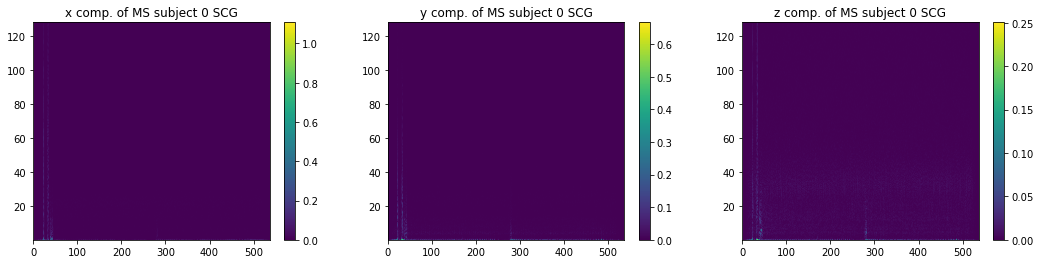

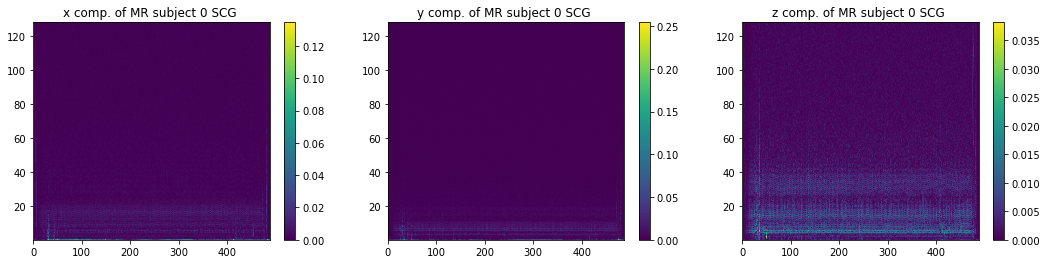

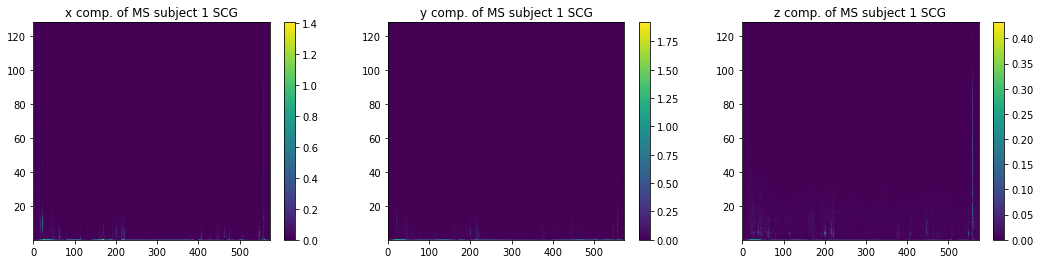

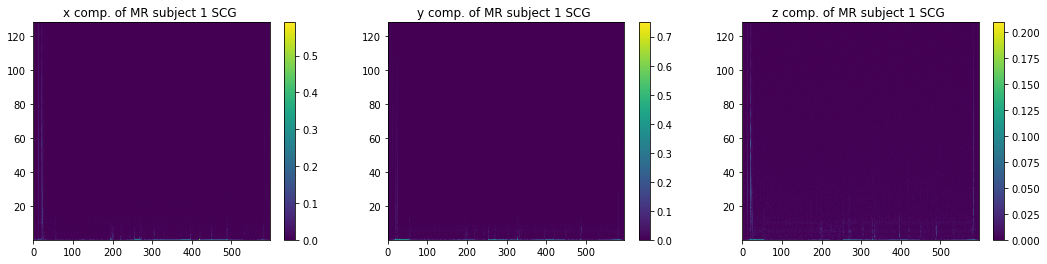

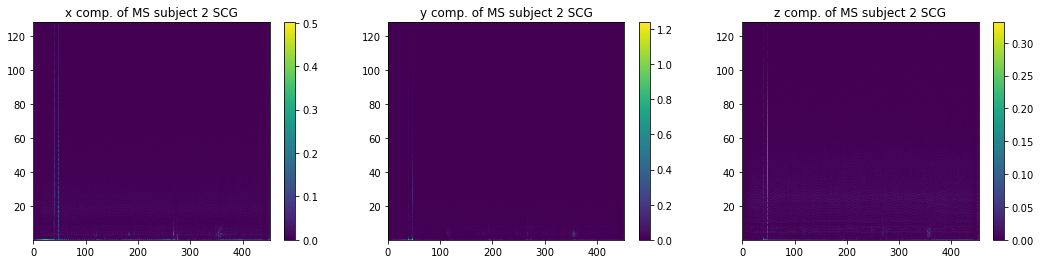

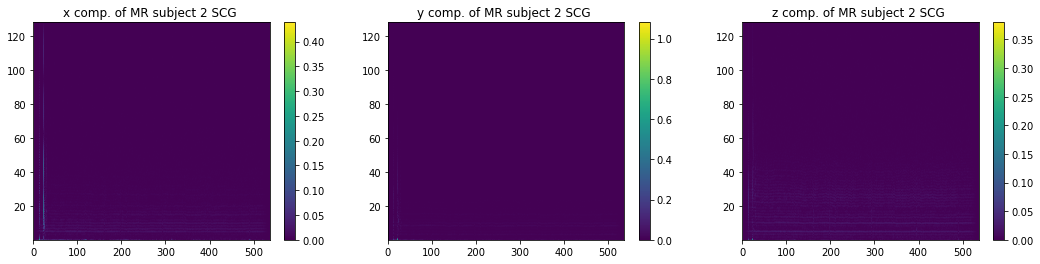

In [36]:
for i in range(len(diseased_MS['Patient ID'].index)):
    
        MS_s_x, MS_e_x, MS_end_x = output_spectrogram(MS_x[i].data, MS_x[i].stats.sampling_rate)
        MS_s_y, MS_e_y, MS_end_y = output_spectrogram(MS_y[i].data, MS_y[i].stats.sampling_rate)
        MS_s_z, MS_e_z, MS_end_z = output_spectrogram(MS_z[i].data, MS_z[i].stats.sampling_rate)
        
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,4))

        ax1.imshow(MS_s_x, interpolation="nearest", extent= MS_e_x, vmin =0)
        ax1.axis('tight')
        ax1.set_xlim(0, MS_end_x)
        ax1.title.set_text('x comp. of MS subject {} SCG'.format(i))
        ax1.grid(False)
        fig.colorbar(ax1.images[0], ax = ax1)
       
        
        ax2.imshow(MS_s_y, interpolation="nearest", extent= MS_e_y, vmin = 0)
        ax2.axis('tight')
        ax2.set_xlim(0, MS_end_y)
        ax2.title.set_text('y comp. of MS subject {} SCG'.format(i))
        ax2.grid(False)
        fig.colorbar(ax2.images[0], ax = ax2)
        
        ax3.imshow(MS_s_z, interpolation="nearest", extent= MS_e_z, vmin =0)
        ax3.axis('tight')
        ax3.set_xlim(0, MS_end_z)
        ax3.title.set_text('z comp. of MS subject {} SCG'.format(i))
        ax3.grid(False)
        fig.colorbar(ax3.images[0], ax = ax3)
        
        
        MR_s_x, MR_e_x, MR_end_x = output_spectrogram(MR_x[i].data, MR_x[i].stats.sampling_rate)
        MR_s_y, MR_e_y, MR_end_y = output_spectrogram(MR_y[i].data, MR_y[i].stats.sampling_rate)
        MR_s_z, MR_e_z, MR_end_z = output_spectrogram(MR_z[i].data, MR_z[i].stats.sampling_rate)
        
        fig, (ax4, ax5, ax6) = plt.subplots(1, 3,  figsize=(18,4))

        ax4.imshow(MR_s_x, interpolation="nearest", extent= MR_e_x, vmin = 0)
        ax4.axis('tight')
        ax4.set_xlim(0, MR_end_x)
        ax4.title.set_text('x comp. of MR subject {} SCG '.format(i))
        ax4.grid(False)
        fig.colorbar(ax4.images[0], ax = ax4)
        
        ax5.imshow(MR_s_y, interpolation="nearest", extent= MR_e_y, vmin = 0)
        ax5.axis('tight')
        ax5.set_xlim(0, MR_end_y)
        ax5.title.set_text('y comp. of MR subject {} SCG '.format(i))
        ax5.grid(False)
        fig.colorbar(ax5.images[0], ax = ax5)
    
        ax6.imshow(MR_s_z, interpolation="nearest", extent= MR_e_z, vmin = 0)
        ax6.axis('tight')
        ax6.set_xlim(0, MR_end_z)
        ax6.title.set_text('z comp. of MR subject {} SCG '.format(i))
        ax6.grid(False)
        fig.colorbar(ax6.images[0], ax = ax6)


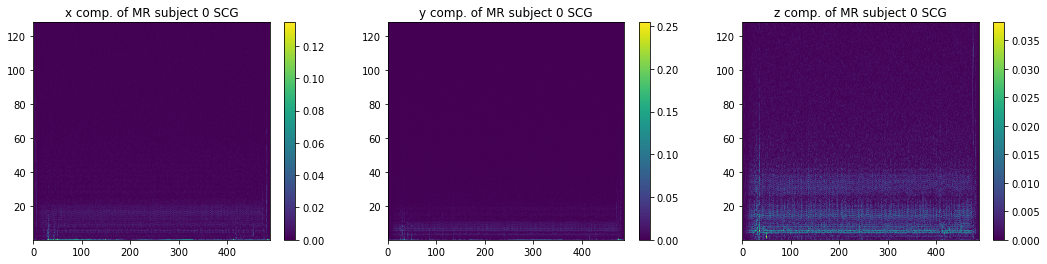

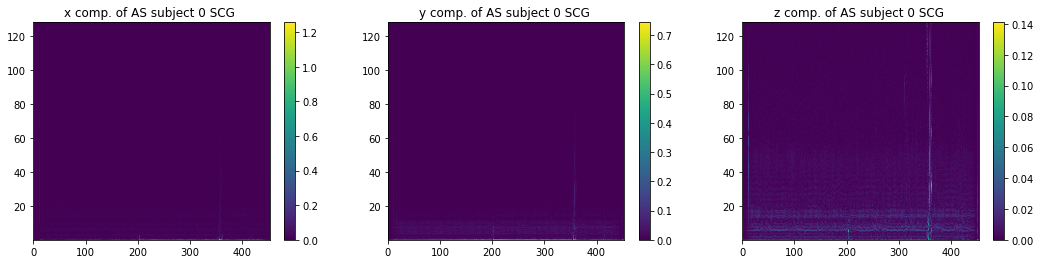

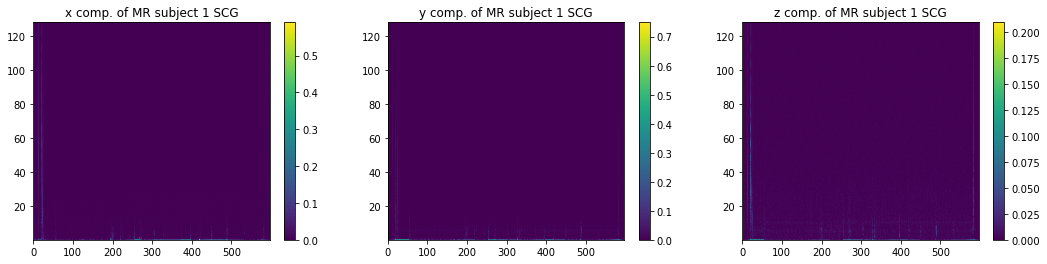

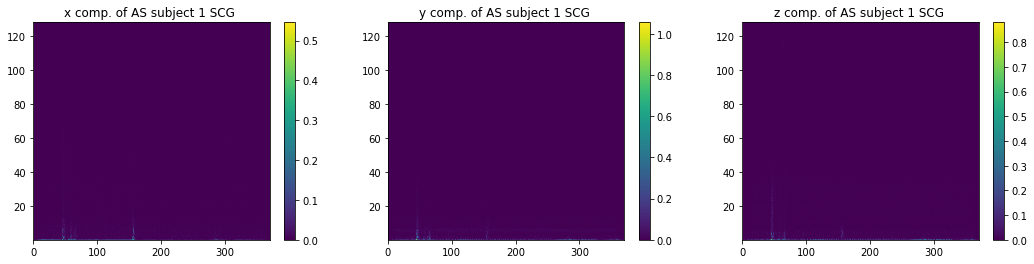

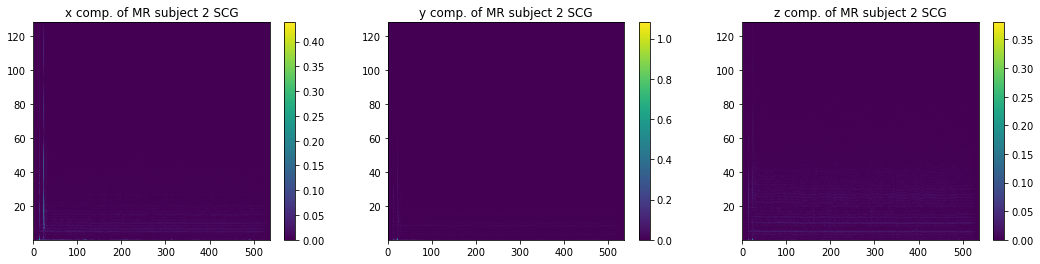

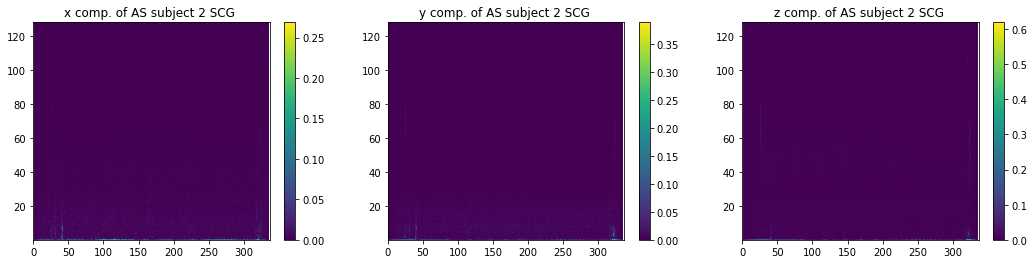

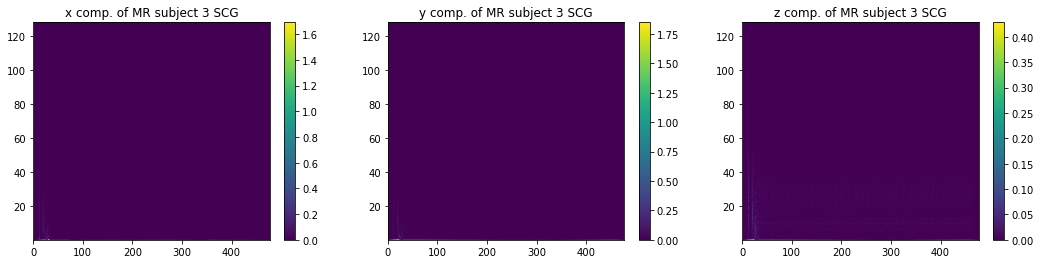

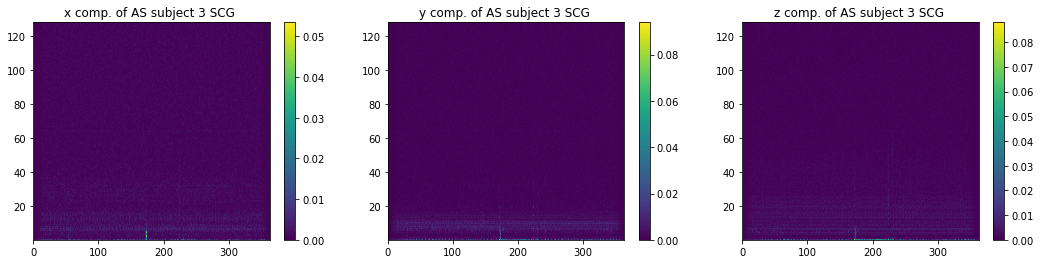

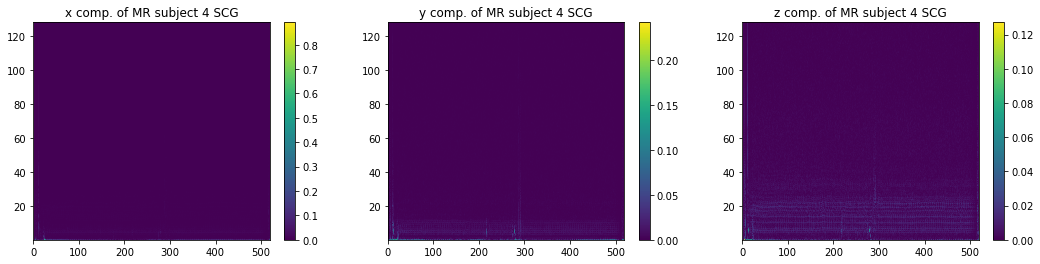

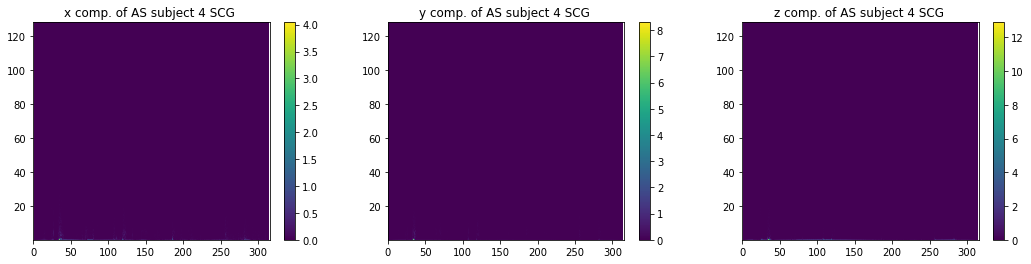

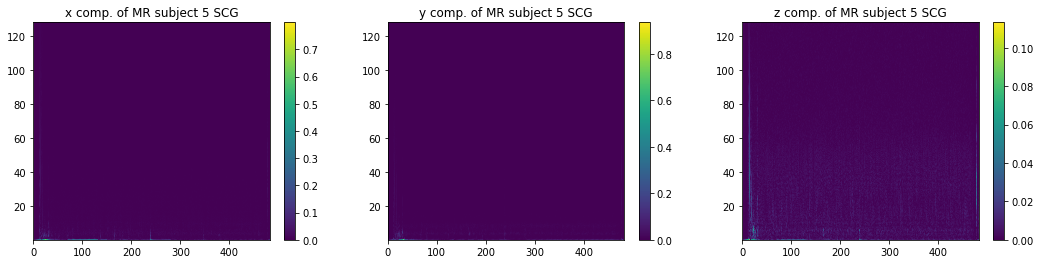

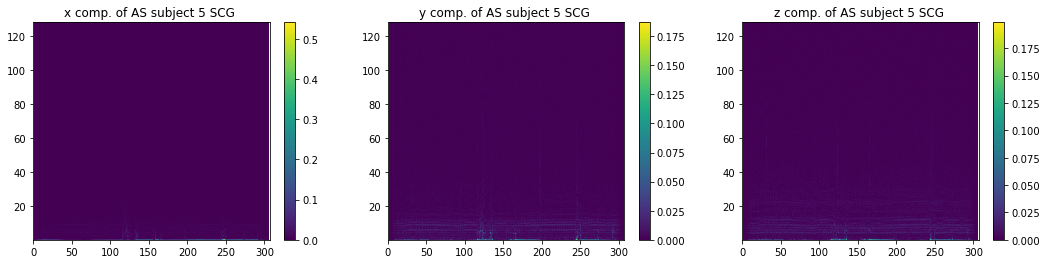

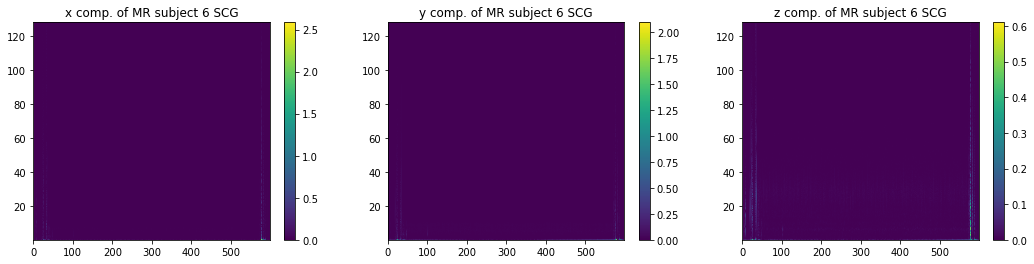

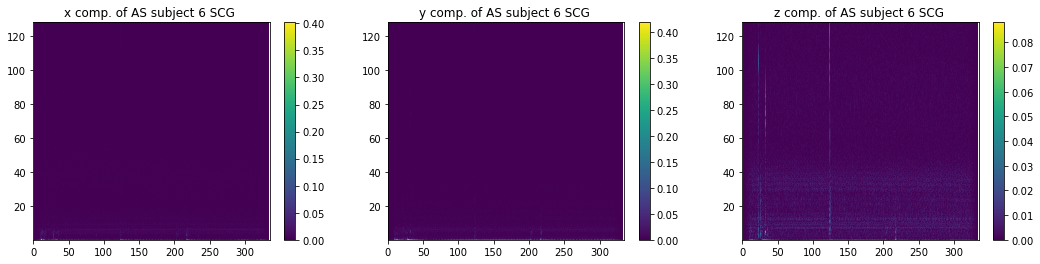

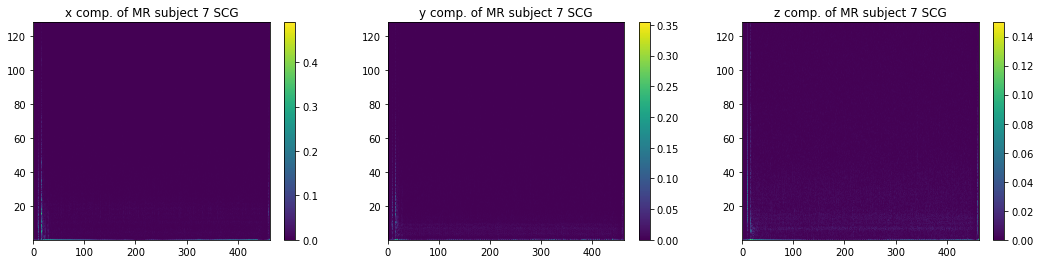

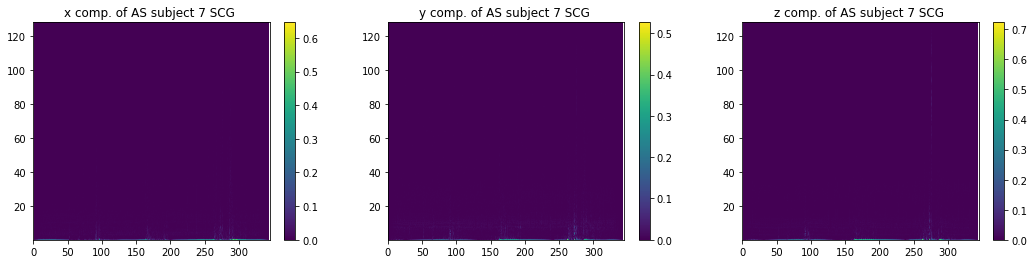

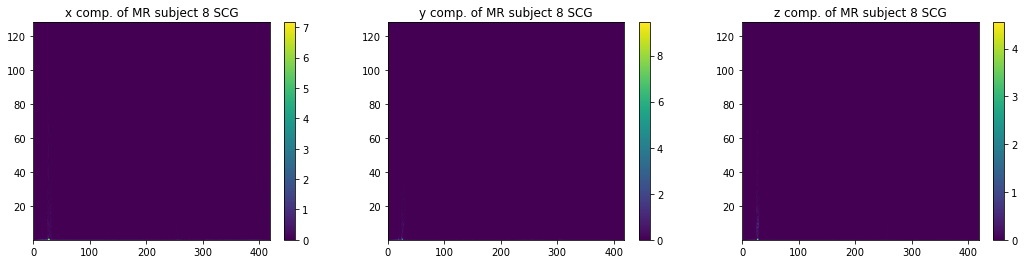

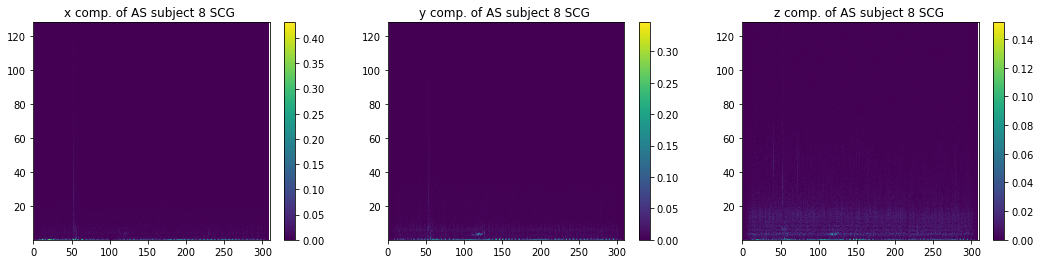

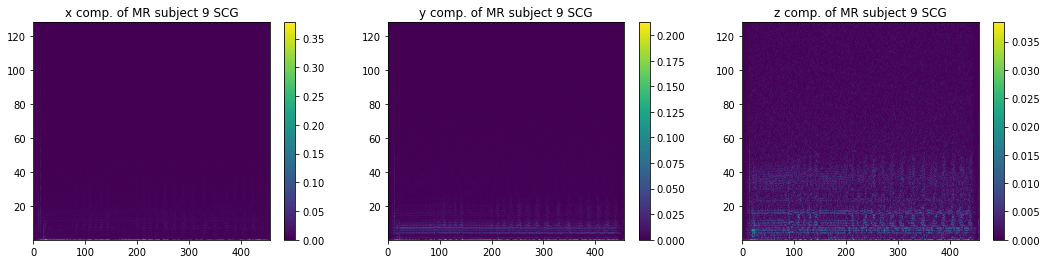

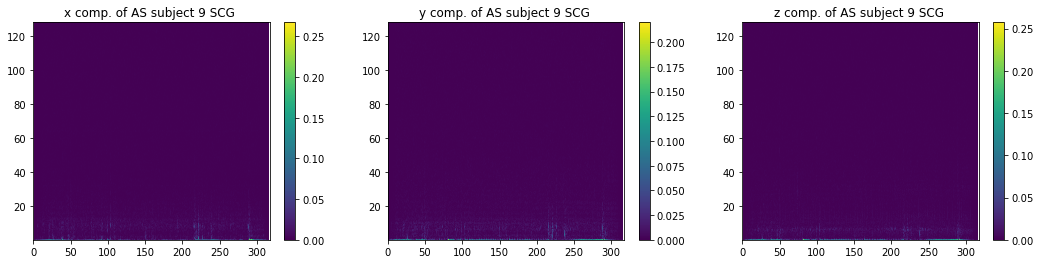

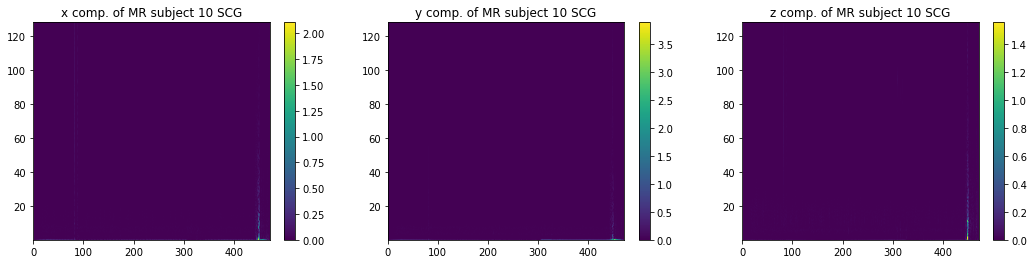

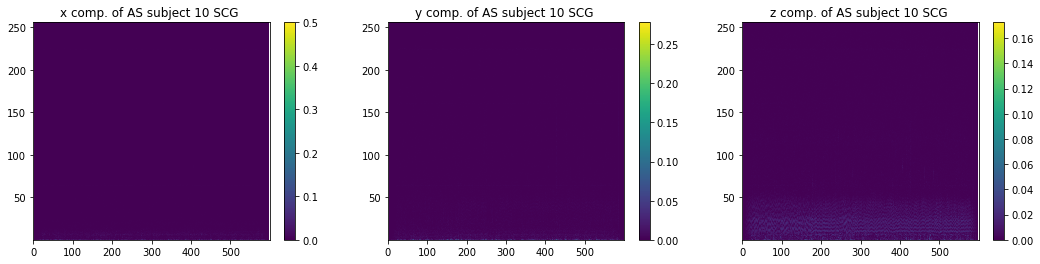

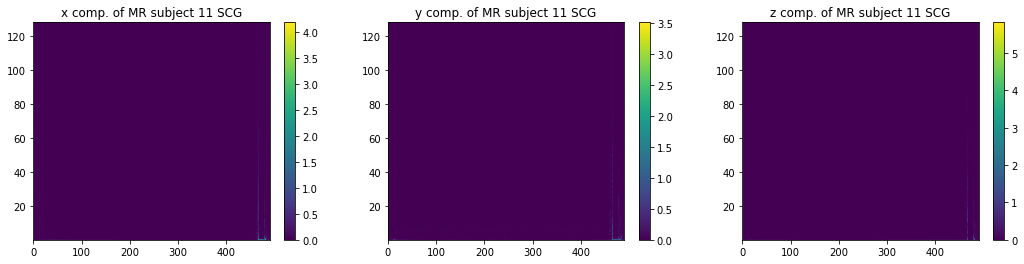

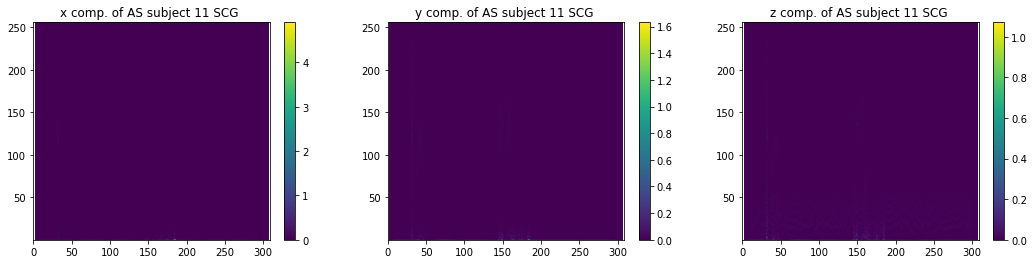

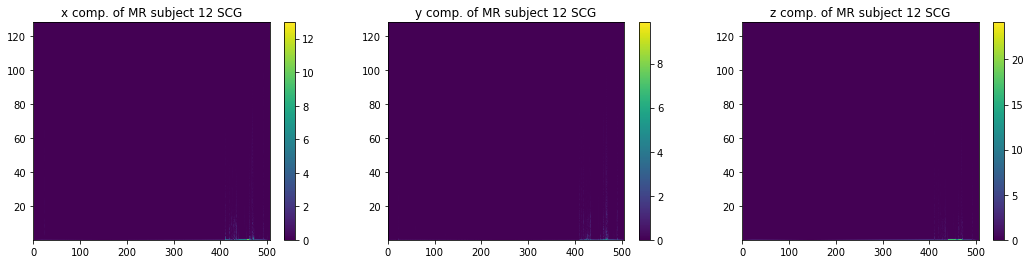

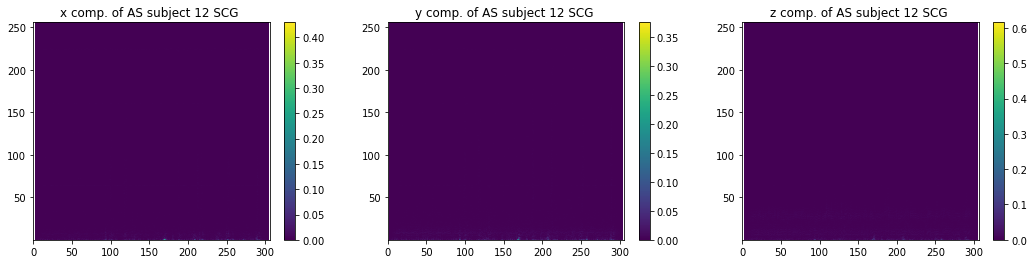

In [37]:
for i in range(len(diseased_MR['Patient ID'].index)):
    
        MR_s_x, MR_e_x, MR_end_x = output_spectrogram(MR_x[i].data, MR_x[i].stats.sampling_rate)
        MR_s_y, MR_e_y, MR_end_y = output_spectrogram(MR_y[i].data, MR_y[i].stats.sampling_rate)
        MR_s_z, MR_e_z, MR_end_z = output_spectrogram(MR_z[i].data, MR_z[i].stats.sampling_rate)

        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,4))

        ax1.imshow(MR_s_x, interpolation="nearest", extent= MR_e_x, vmin =0)
        ax1.axis('tight')
        ax1.set_xlim(0, MR_end_x)
        ax1.title.set_text('x comp. of MR subject {} SCG'.format(i))
        ax1.grid(False)
        fig.colorbar(ax1.images[0], ax = ax1)
       
        
        ax2.imshow(MR_s_y, interpolation="nearest", extent= MR_e_y, vmin = 0)
        ax2.axis('tight')
        ax2.set_xlim(0, MR_end_y)
        ax2.title.set_text('y comp. of MR subject {} SCG'.format(i))
        ax2.grid(False)
        fig.colorbar(ax2.images[0], ax = ax2)
        
        ax3.imshow(MR_s_z, interpolation="nearest", extent= MR_e_z, vmin =0)
        ax3.axis('tight')
        ax3.set_xlim(0, MR_end_z)
        ax3.title.set_text('z comp. of MR subject {} SCG'.format(i))
        ax3.grid(False)
        fig.colorbar(ax3.images[0], ax = ax3)
        
        
        AS_s_x, AS_e_x, AS_end_x = output_spectrogram(AS_x[i].data, AS_x[i].stats.sampling_rate)
        AS_s_y, AS_e_y, AS_end_y = output_spectrogram(AS_y[i].data, AS_y[i].stats.sampling_rate)
        AS_s_z, AS_e_z, AS_end_z = output_spectrogram(AS_z[i].data, AS_z[i].stats.sampling_rate)
        
        fig, (ax4, ax5, ax6) = plt.subplots(1, 3,  figsize=(18,4))

        ax4.imshow(AS_s_x, interpolation="nearest", extent= AS_e_x, vmin = 0)
        ax4.axis('tight')
        ax4.set_xlim(0, AS_end_x)
        ax4.title.set_text('x comp. of AS subject {} SCG '.format(i))
        ax4.grid(False)
        fig.colorbar(ax4.images[0], ax = ax4)
        
        ax5.imshow(AS_s_y, interpolation="nearest", extent= AS_e_y, vmin = 0)
        ax5.axis('tight')
        ax5.set_xlim(0, AS_end_y)
        ax5.title.set_text('y comp. of AS subject {} SCG '.format(i))
        ax5.grid(False)
        fig.colorbar(ax5.images[0], ax = ax5)
    
        ax6.imshow(AS_s_z, interpolation="nearest", extent= AS_e_z, vmin = 0)
        ax6.axis('tight')
        ax6.set_xlim(0, AS_end_z)
        ax6.title.set_text('z comp. of AS subject {} SCG '.format(i))
        ax6.grid(False)
        fig.colorbar(ax6.images[0], ax = ax6)

## Zero Crossing Rate:

In [28]:
import librosa as lbs

Zero crossing rate of MS's: 1
Zero crossing rate of MS's: 1
Zero crossing rate of MS's: 1
mean of zero crossing values: 0.1787908170706794


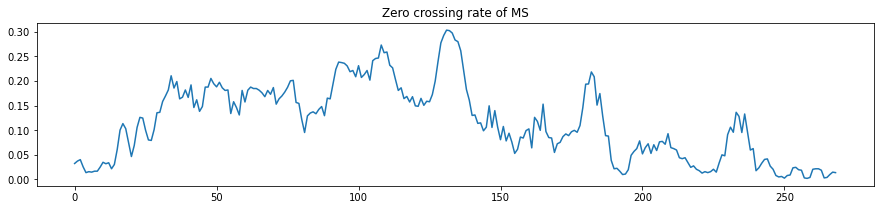

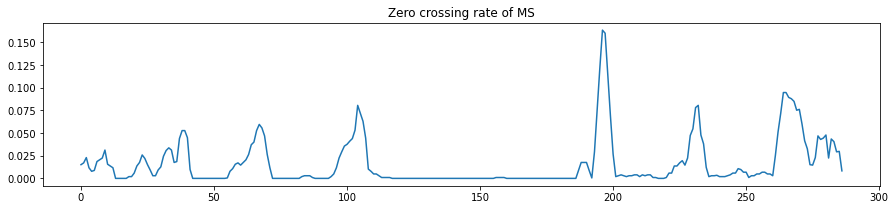

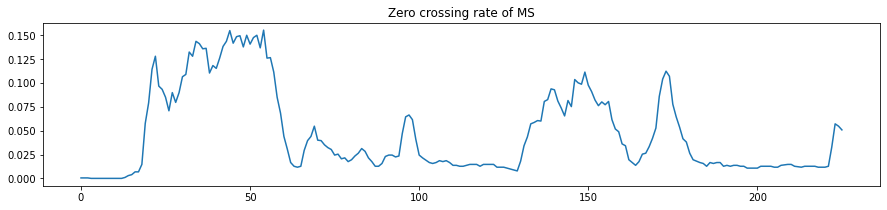

In [29]:
total_MS = 0
for i in range(len(diseased_MS['Patient ID'].index)):
    zcrs = lbs.feature.zero_crossing_rate(np.array(MS_x[i]))
    print(f"Zero crossing rate of MS's: {sum(lbs.zero_crossings(np.array(MS_x[i]), 256))}")
    plt.figure(figsize=(15, 3))
    plt.plot(zcrs[0])
    total_MS += zcrs[0].mean()
    plt.title('Zero crossing rate of MS')
print("mean of zero crossing values:", total_MS.mean())

Zero crossing rate of AS's: 4211
Zero crossing rate of AS's: 9839
Zero crossing rate of AS's: 5885
Zero crossing rate of AS's: 27785
Zero crossing rate of AS's: 3395
Zero crossing rate of AS's: 4025
Zero crossing rate of AS's: 12825
Zero crossing rate of AS's: 2177
Zero crossing rate of AS's: 4031
Zero crossing rate of AS's: 8459
Zero crossing rate of AS's: 7154
Zero crossing rate of AS's: 2500
Zero crossing rate of AS's: 3086
Zero crossing rate of AS's: 4834
Zero crossing rate of AS's: 1378
Zero crossing rate of AS's: 4534
mean of zero crossing values: 1.127416792242844


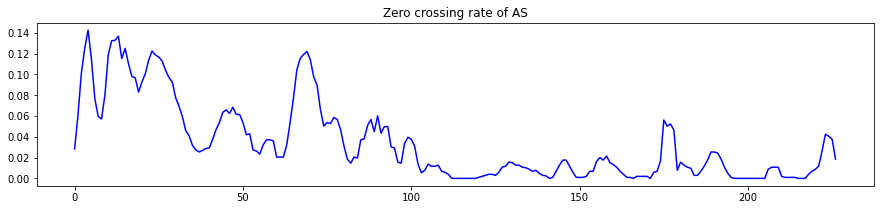

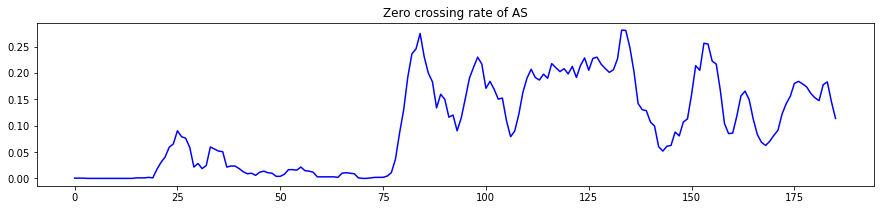

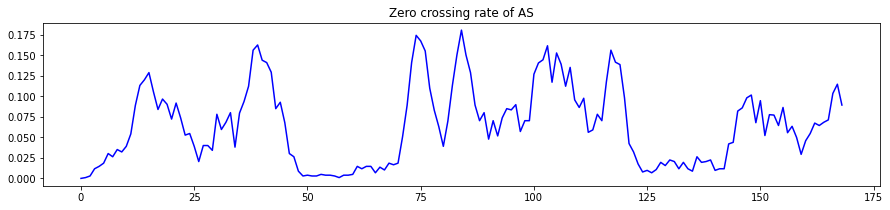

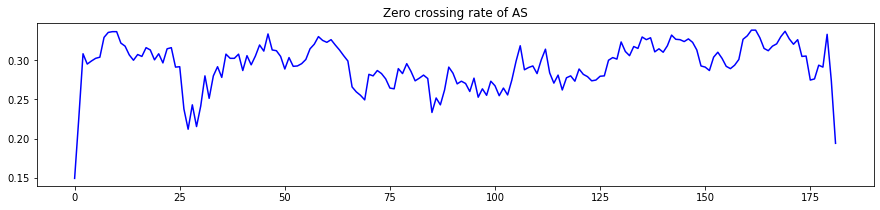

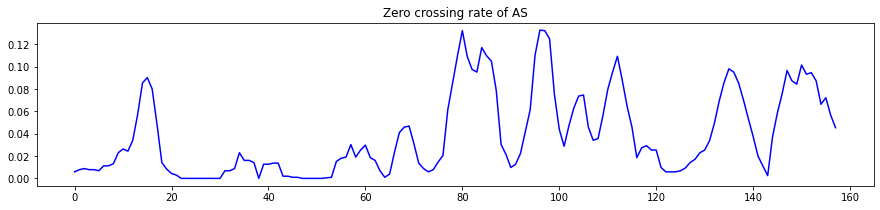

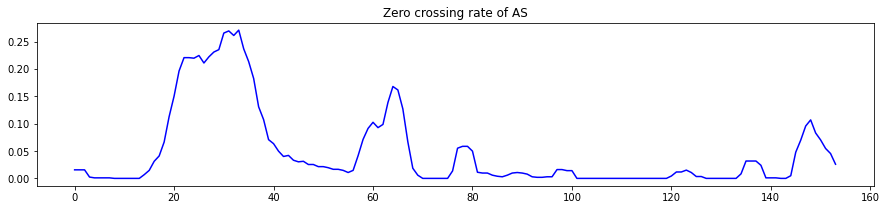

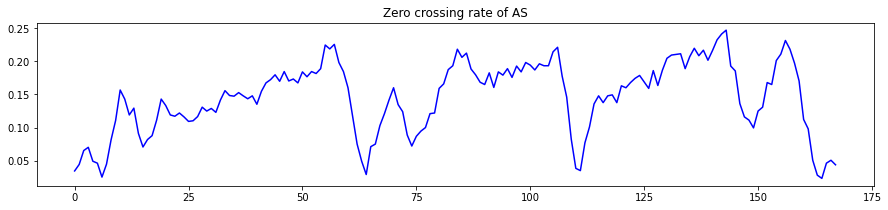

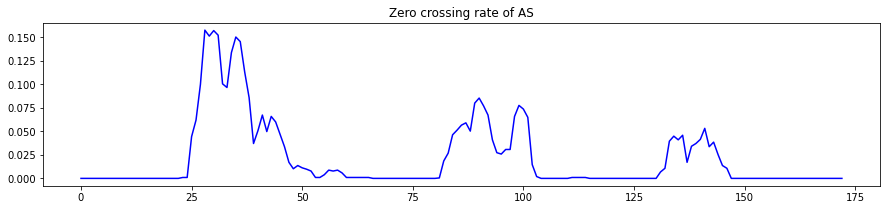

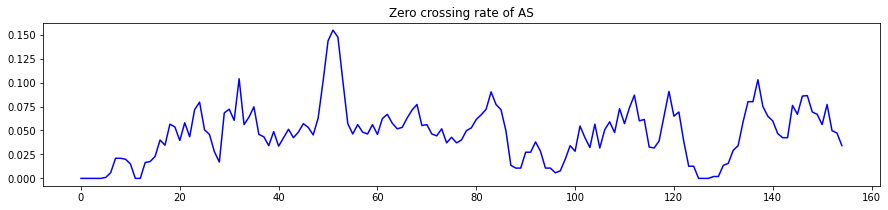

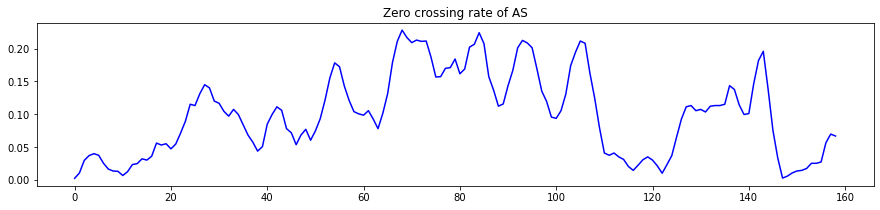

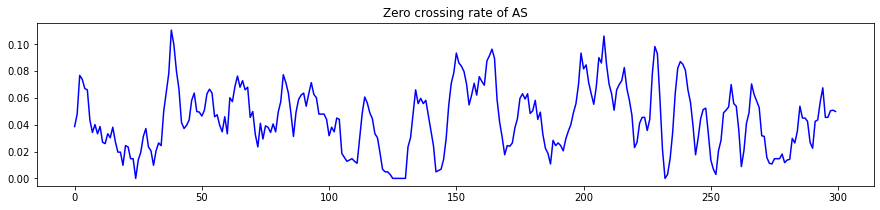

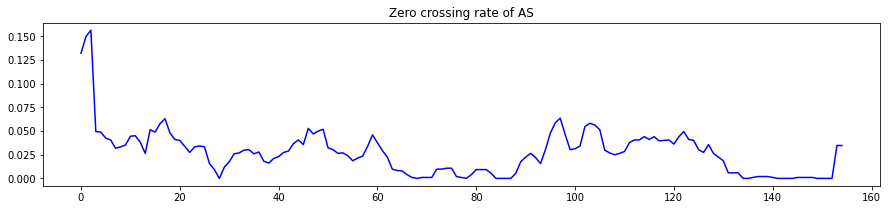

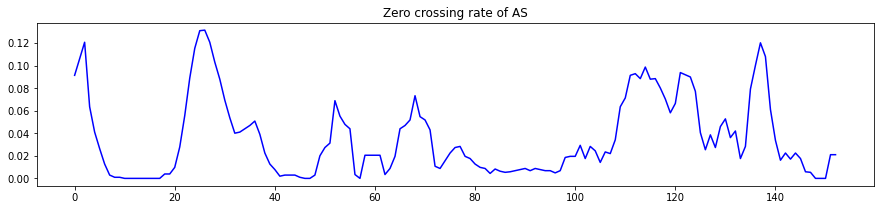

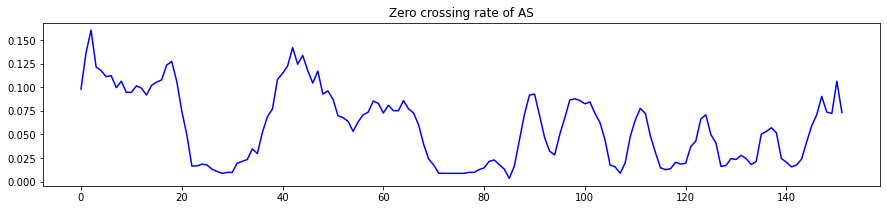

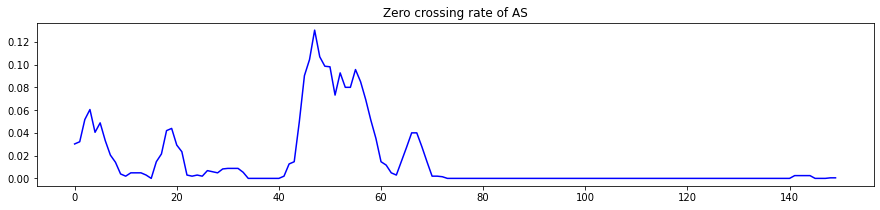

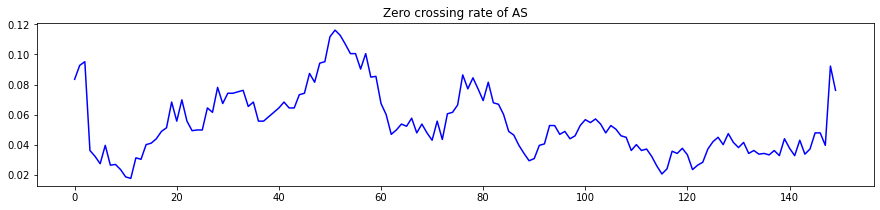

In [38]:
total_AS = 0
for i in range(len(diseased_AS['Patient ID'].index)):
    zcrs = lbs.feature.zero_crossing_rate(np.array(AS_x[i]))
    print(f"Zero crossing rate of AS's: {sum(lbs.zero_crossings(np.array(AS_x[i])), 256)}")
    plt.figure(figsize=(15, 3))
    total_AS += zcrs[0].mean()
    plt.plot(zcrs[0], color ='blue')
    plt.title('Zero crossing rate of AS')
print("mean of zero crossing values:", total_AS.mean())

Zero crossing rate of RS's: 12037
Zero crossing rate of RS's: 11301
Zero crossing rate of RS's: 18913
Zero crossing rate of RS's: 8071
Zero crossing rate of RS's: 6989
Zero crossing rate of RS's: 8369
Zero crossing rate of RS's: 22111
Zero crossing rate of RS's: 5399
Zero crossing rate of RS's: 813
Zero crossing rate of RS's: 6711
Zero crossing rate of RS's: 3331
Zero crossing rate of RS's: 11039
Zero crossing rate of RS's: 1681
mean of zero crossing values: 0.8484550401243229


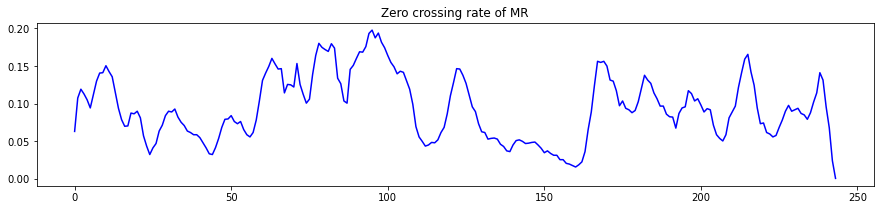

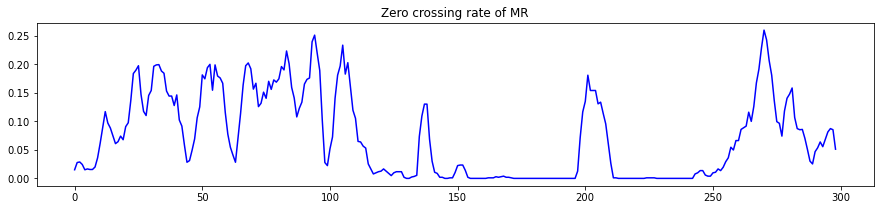

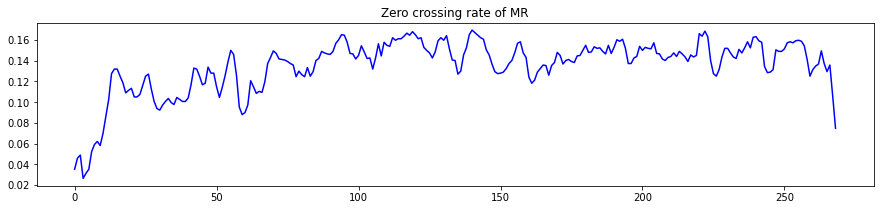

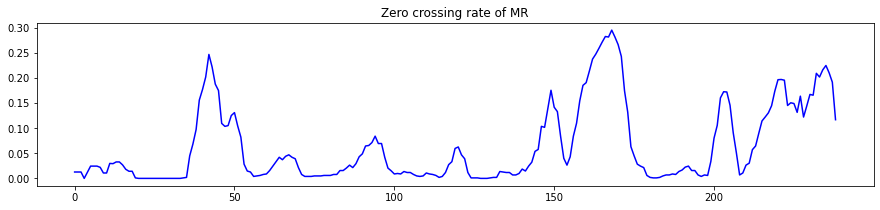

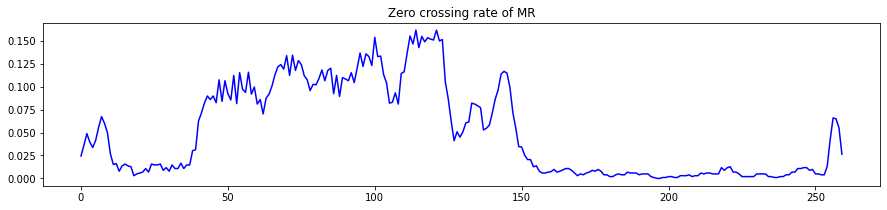

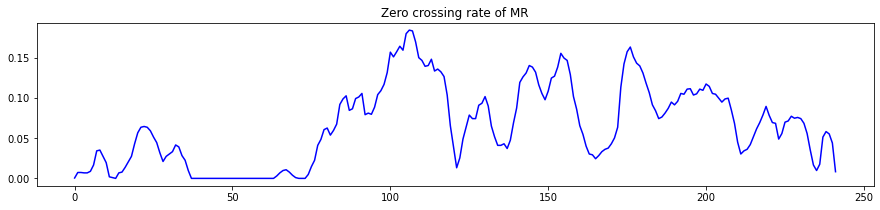

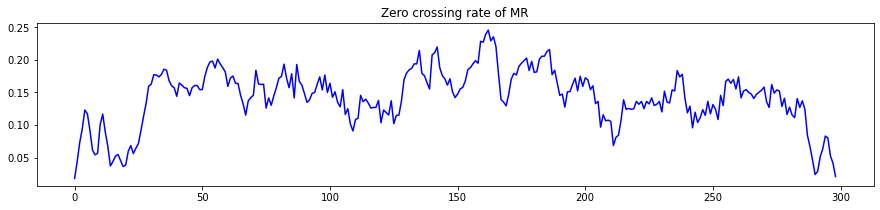

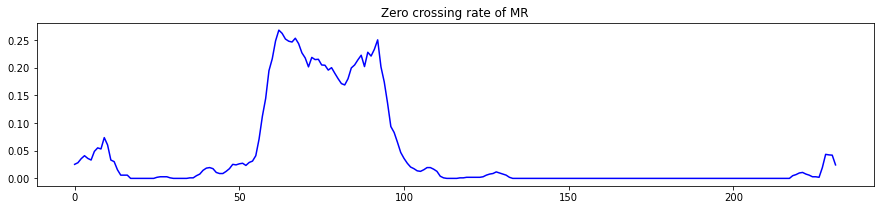

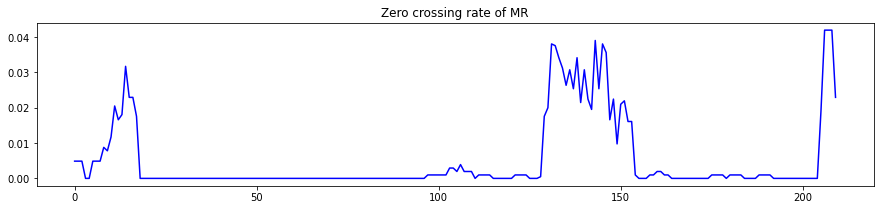

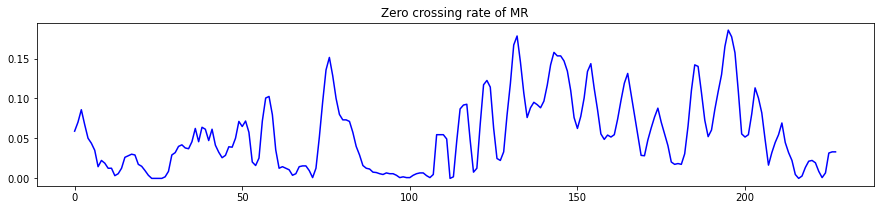

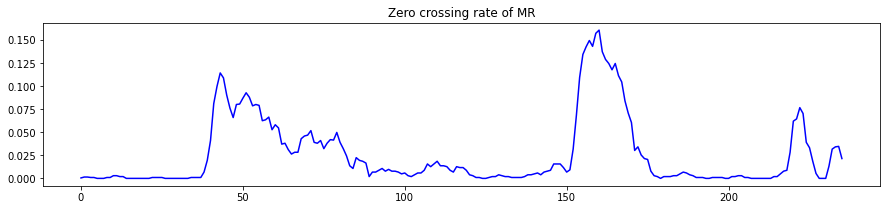

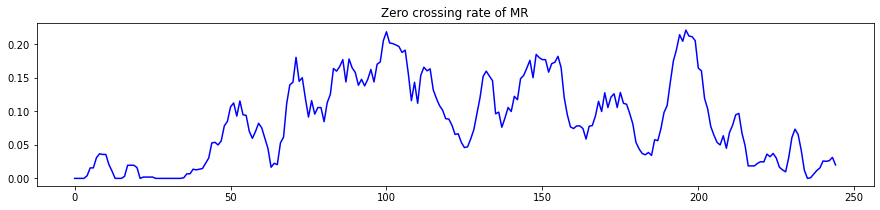

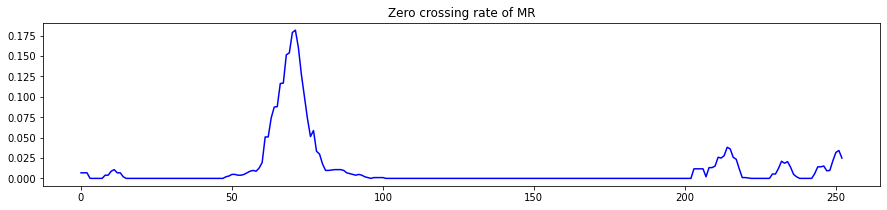

In [39]:
total_MR = 0
for i in range(len(diseased_MR['Patient ID'].index)):
    zcrs = lbs.feature.zero_crossing_rate(np.array(MR_x[i]))
    print(f"Zero crossing rate of RS's: {sum(lbs.zero_crossings(np.array(MR_x[i])),256)}")
    plt.figure(figsize=(15, 3))
    total_MR += zcrs[0].mean()
    plt.plot(zcrs[0], color ='blue')
    plt.title('Zero crossing rate of MR')
print("mean of zero crossing values:", total_MR.mean())

Zero crossing rate of RS's: 2349
Zero crossing rate of RS's: 7585
Zero crossing rate of RS's: 2007
Zero crossing rate of RS's: 1581
Zero crossing rate of RS's: 5535
mean of zero crossing values: 0.14801832934988646


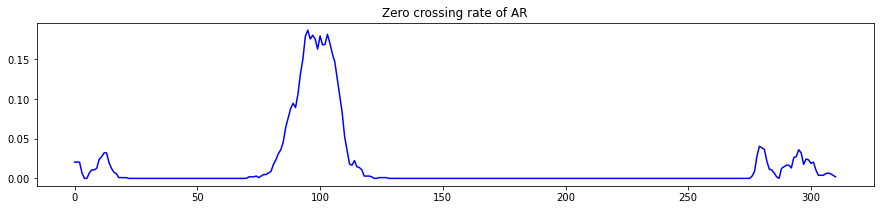

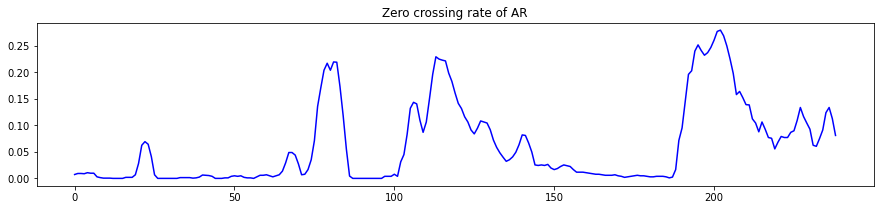

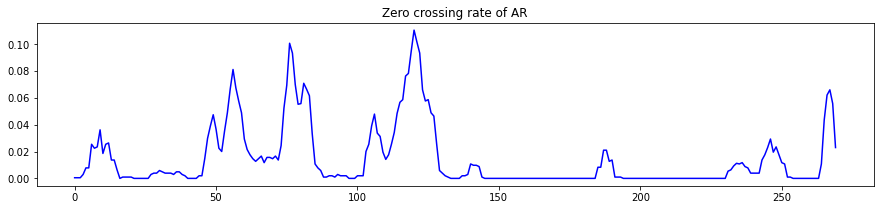

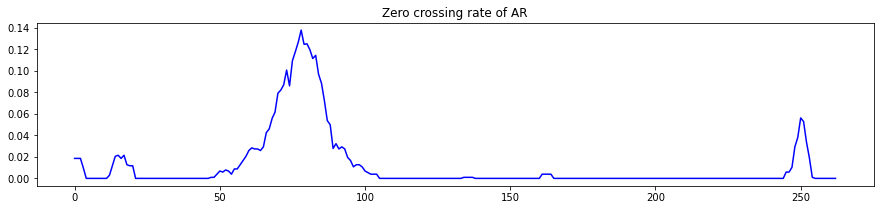

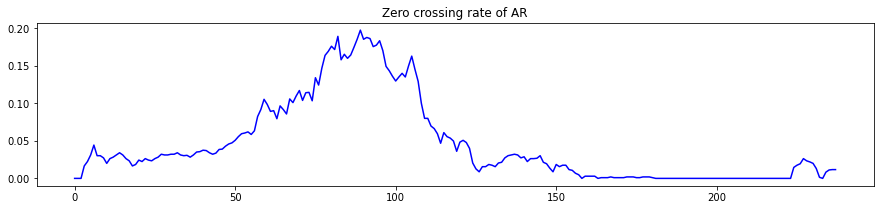

In [42]:
total_AR = 0
for i in range(len(diseased_AR['Patient ID'].index)):
    zcrs = lbs.feature.zero_crossing_rate(np.array(AR_x[i]))
    print(f"Zero crossing rate of RS's: {sum(lbs.zero_crossings(np.array(AR_x[i])))}")
    plt.figure(figsize=(15, 3))
    total_AR += zcrs[0].mean()
    plt.plot(zcrs[0], color ='blue')
    plt.title('Zero crossing rate of AR')
print("mean of zero crossing values:", total_AR.mean())

### Chromogram:
We can use Chroma feature visualization to know how dominant the characteristics of a certain pitch {C, C♯, D, D♯, E, F, F♯, G, G♯, A, A♯, B} is present in the sampled frame.

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
import librosa.display

In [35]:
chromagram = lbs.feature.chroma_stft(np.array(MS_x[i]), 
                                             sr= np.array(MS_x[i].stats.sampling_rate),
                                             hop_length = 512)

In [40]:
chromagram.shape

(12, 226)

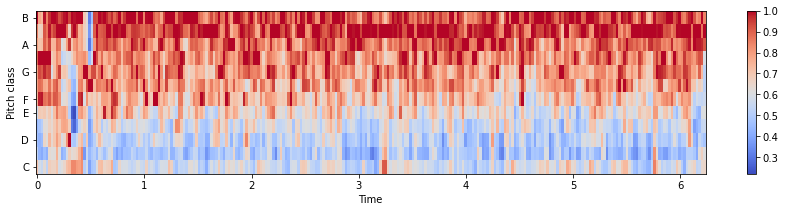

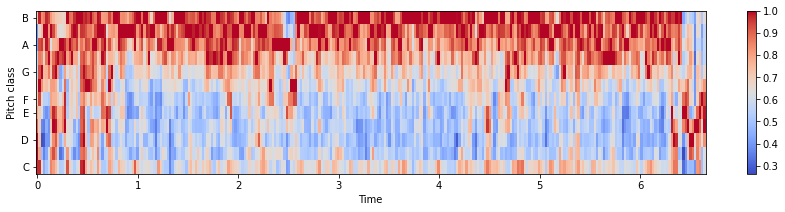

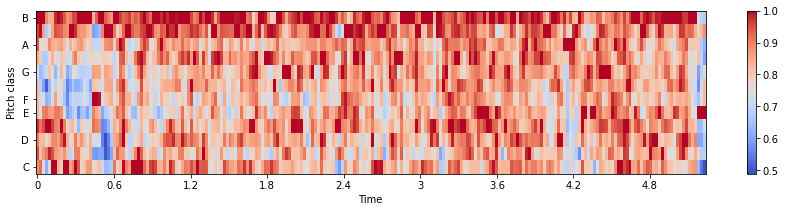

In [32]:
for i in range(3):
    chromagram = lbs.feature.chroma_stft(np.array(MS_x[i]), 
                                             sr= np.array(MS_x[i].stats.sampling_rate),
                                             hop_length = 512)
    fig, ax = plt.subplots(figsize=(15, 3))
    img = librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')
    fig.colorbar(img, ax=ax)

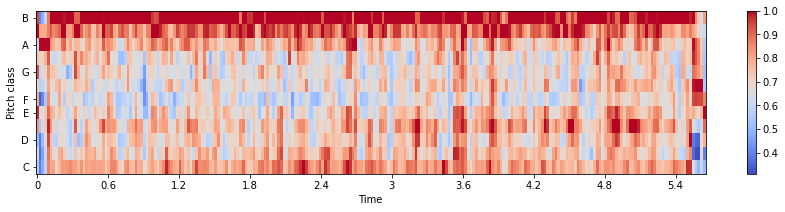

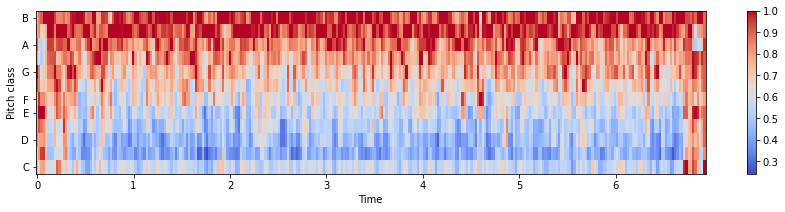

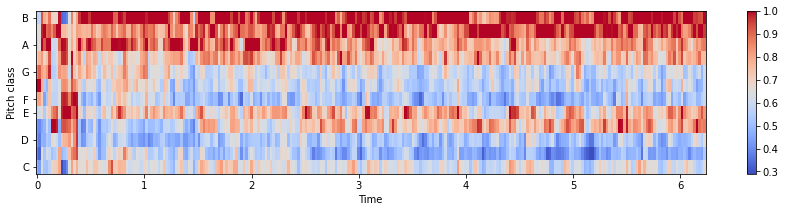

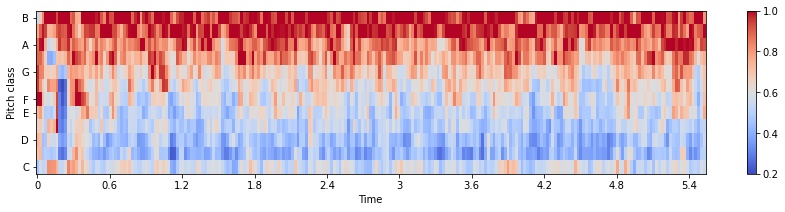

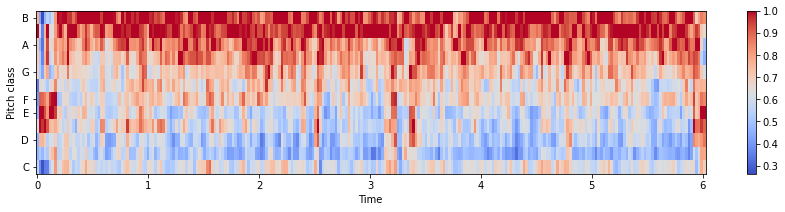

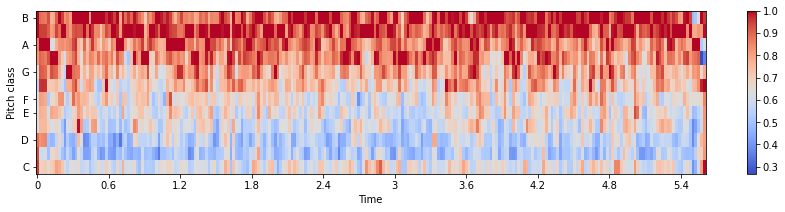

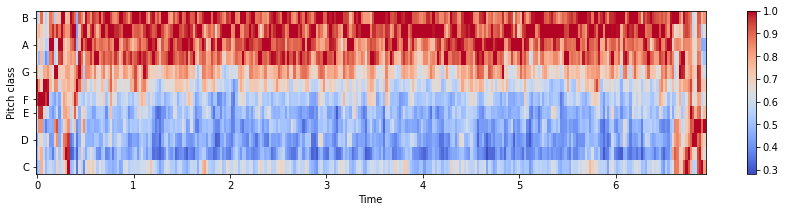

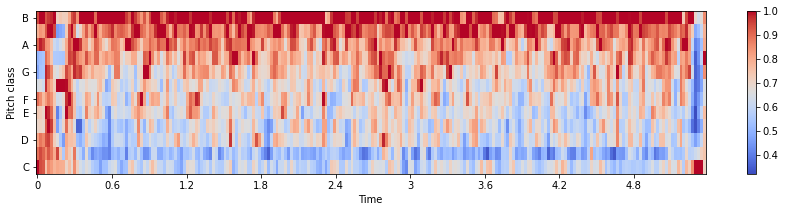

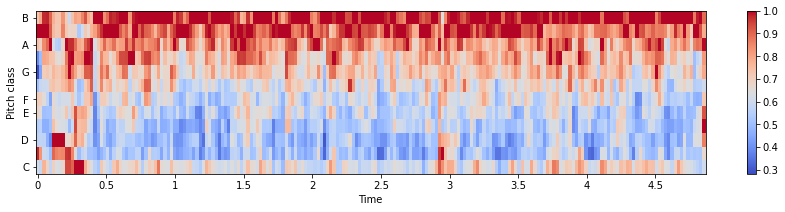

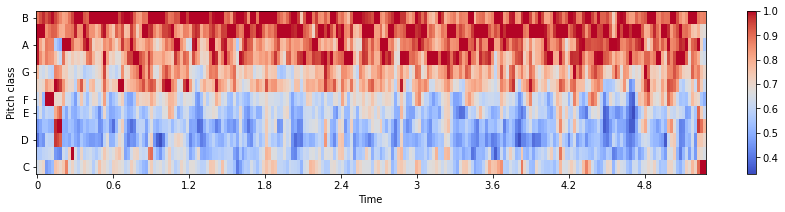

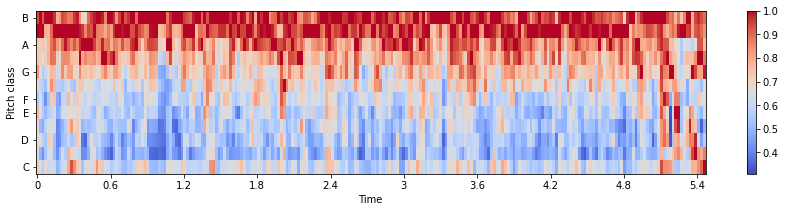

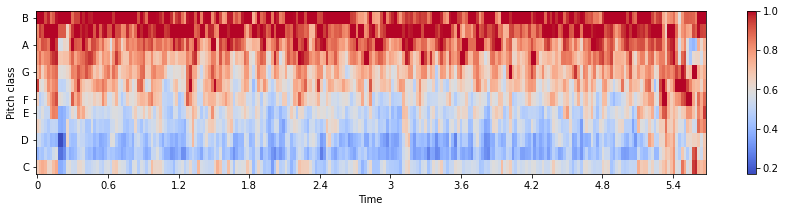

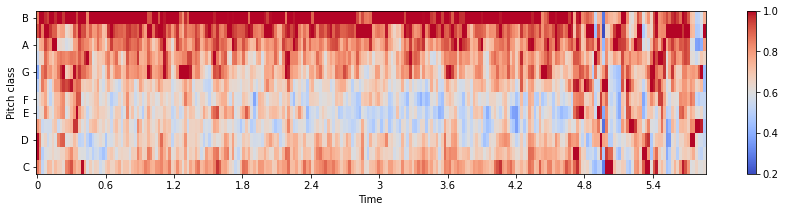

In [46]:
for i in range(len(diseased_MR)):
    chromagram = lbs.feature.chroma_stft(np.array(MR_x[i]), 
                                             sr= np.array(MR_x[i].stats.sampling_rate),
                                             hop_length = 512)
    fig, ax = plt.subplots(figsize=(15, 3))
    img = librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')
    fig.colorbar(img, ax=ax)

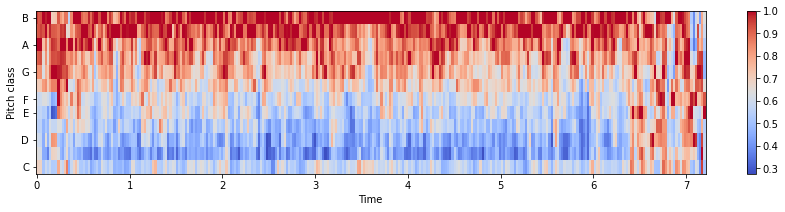

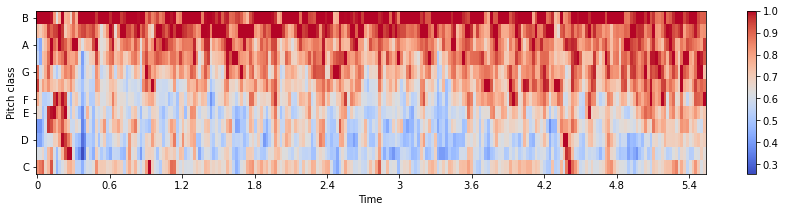

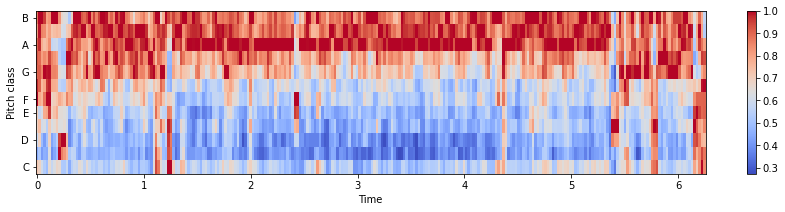

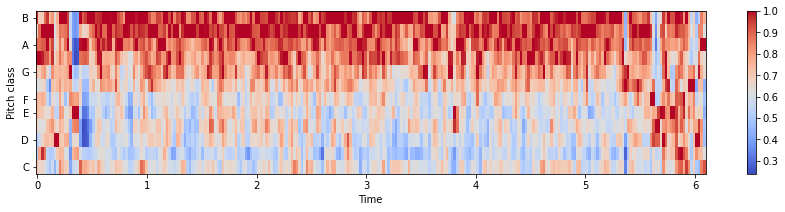

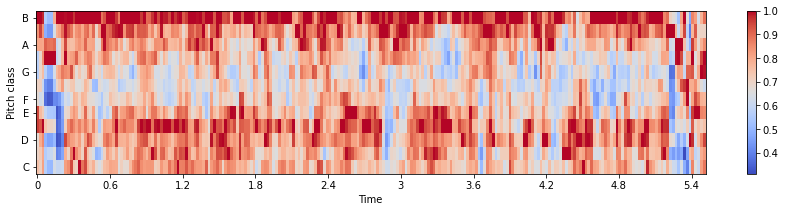

In [47]:
for i in range(len(diseased_AR)):
    chromagram = lbs.feature.chroma_stft(np.array(AR_x[i]), 
                                             sr= np.array(AR_x[i].stats.sampling_rate),
                                             hop_length = 512)
    fig, ax = plt.subplots(figsize=(15, 3))
    img = librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')
    fig.colorbar(img, ax=ax)

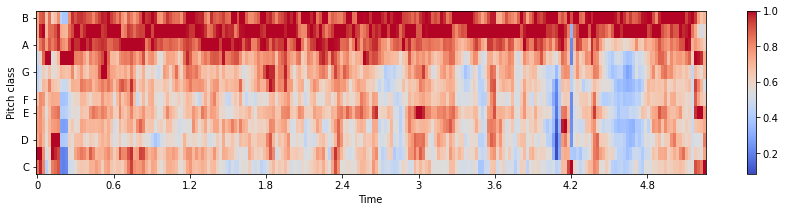

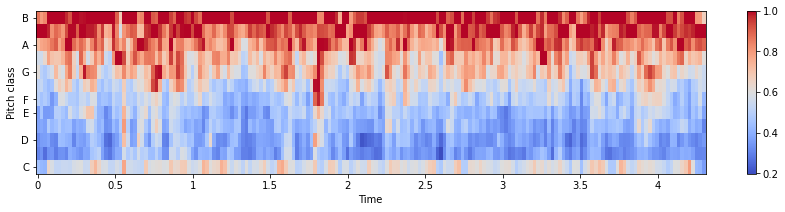

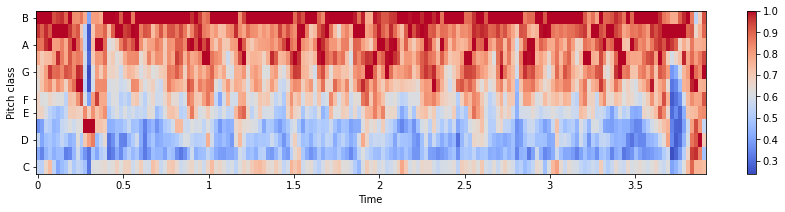

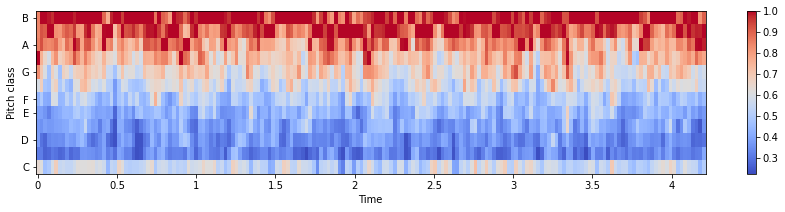

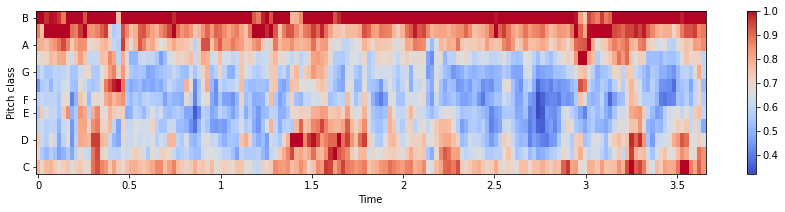

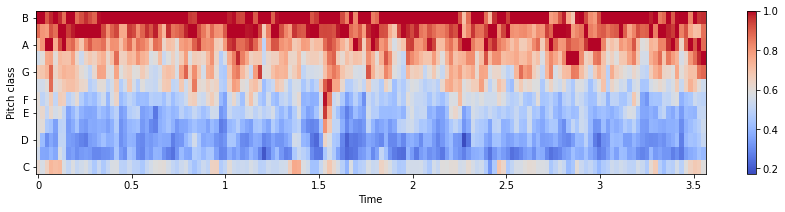

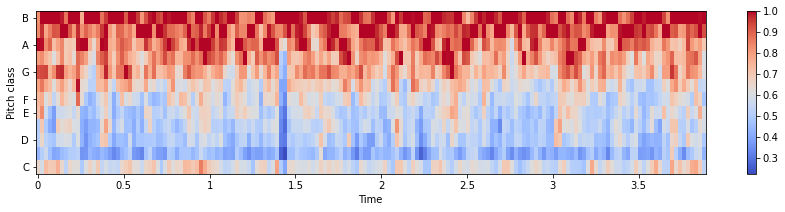

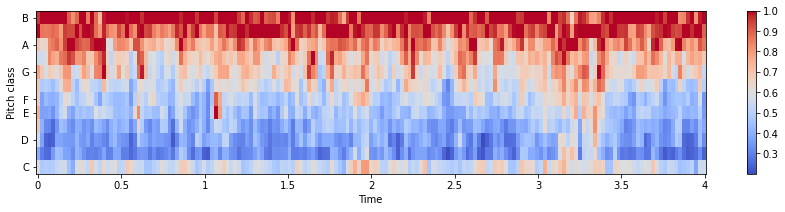

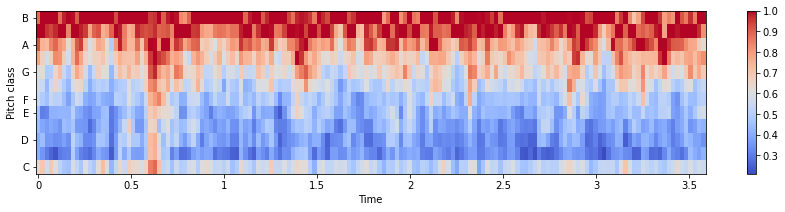

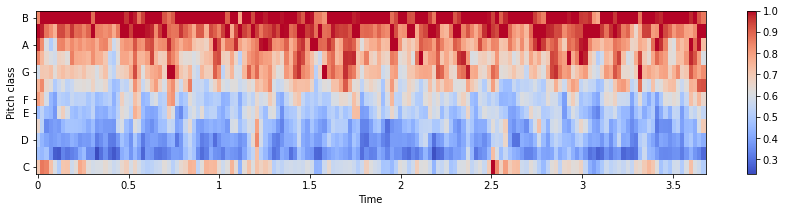

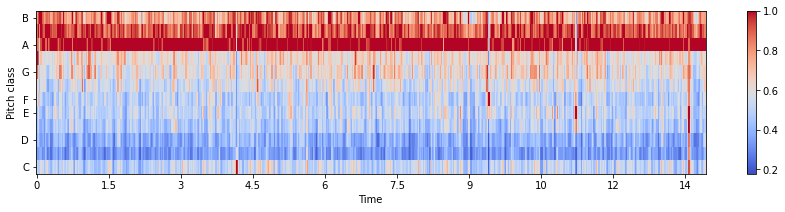

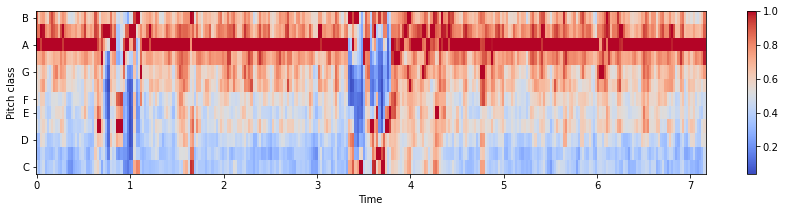

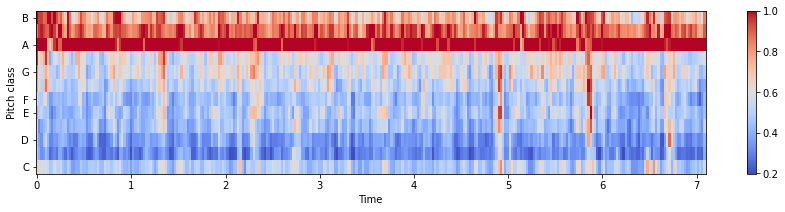

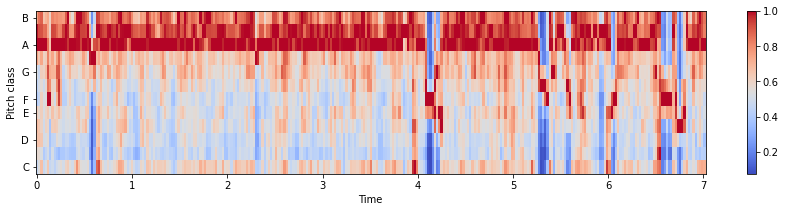

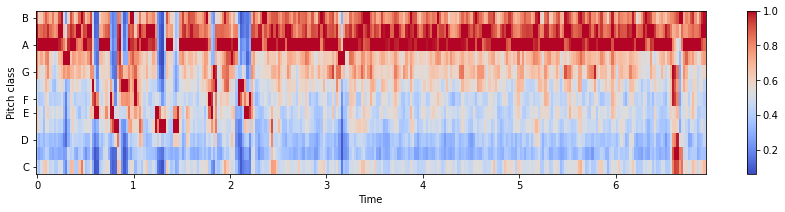

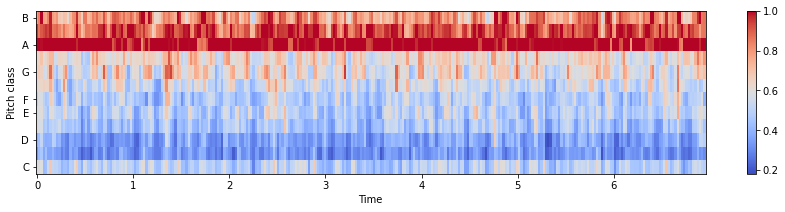

In [48]:
for i in range(len(diseased_AS)):
    chromagram = lbs.feature.chroma_stft(np.array(AS_x[i]), 
                                             sr= np.array(AS_x[i].stats.sampling_rate),
                                             hop_length = 512)
    fig, ax = plt.subplots(figsize=(15, 3))
    img = librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')
    fig.colorbar(img, ax=ax)

In [49]:
def tempogram(array = 0, hop_lenght = 256):
    hop_length = 256
    for i in range(len(array)):
        oenv = librosa.onset.onset_strength(y=np.array(array[i]), 
                                            sr=np.array(array[i].stats.sampling_rate), 
                                            hop_length=hop_length)

        times = librosa.times_like(oenv, sr=np.array(array[i].stats.sampling_rate), hop_length=hop_length)

        tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=np.array(array[i].stats.sampling_rate),
                                              hop_length=hop_length)
        # Estimate the global tempo for display purposes
        tempo = librosa.beat.tempo(onset_envelope=oenv, sr=np.array(array[i].stats.sampling_rate),
                                   hop_length=hop_length)[0]

        print(tempo)

        librosa.display.specshow(tempogram, sr=np.array(array[i].stats.sampling_rate), hop_length=hop_length,
                               x_axis='time', y_axis='tempo', cmap='magma')
        plt.show()


60.0


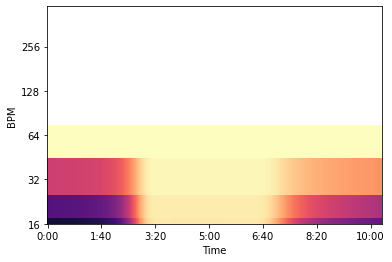

60.0


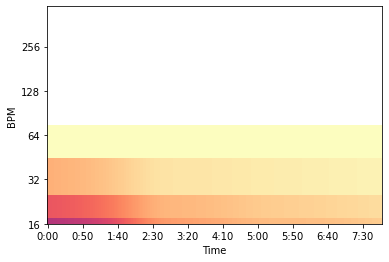

60.0


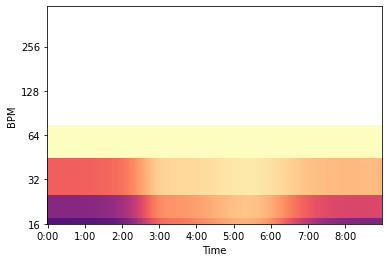

60.0


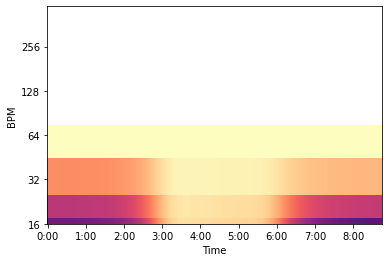

60.0


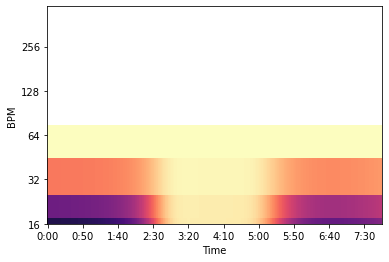

In [50]:
tempogram(AR_x)

60.0


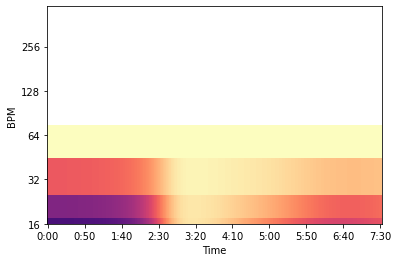

60.0


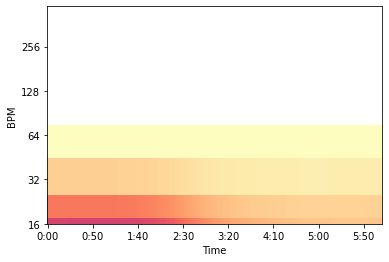

60.0


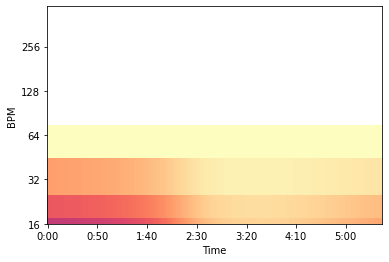

60.0


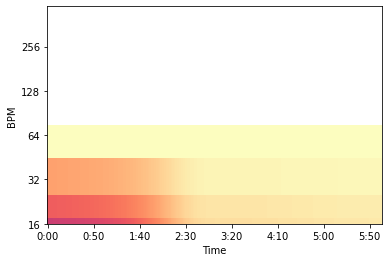

60.0


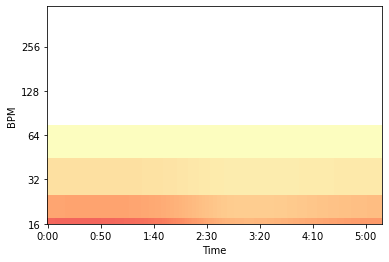

60.0


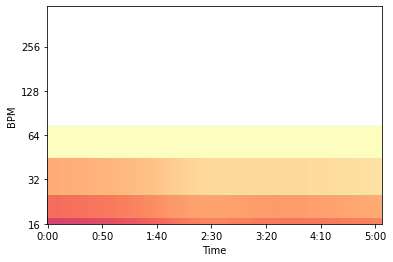

60.0


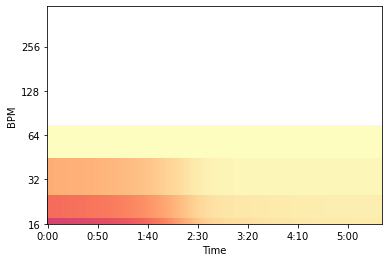

60.0


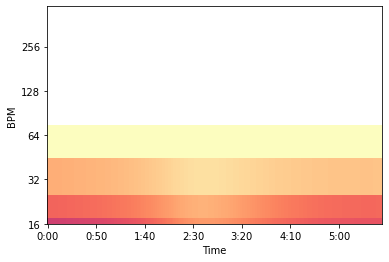

60.0


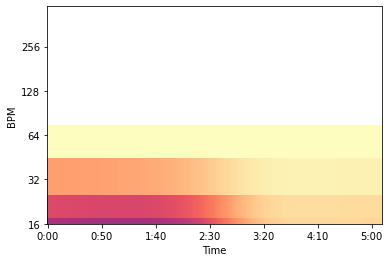

60.0


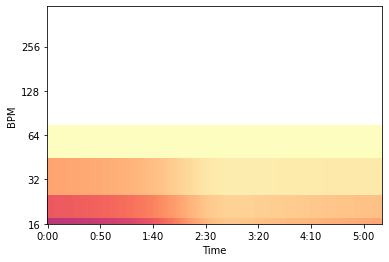

120.0


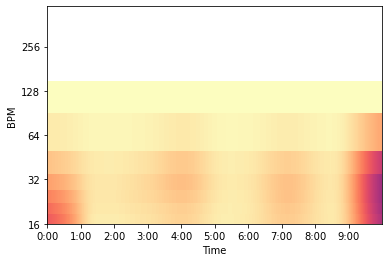

120.0


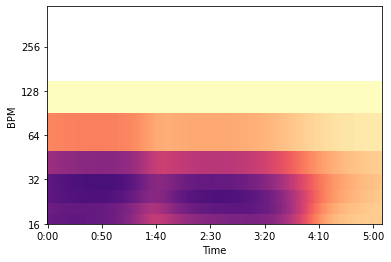

120.0


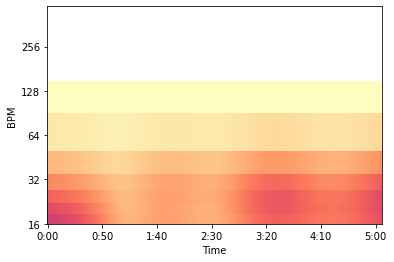

120.0


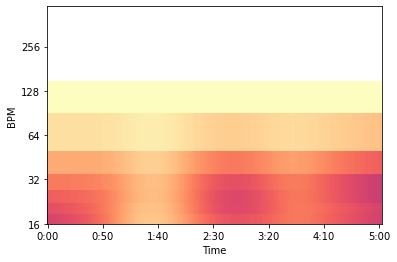

120.0


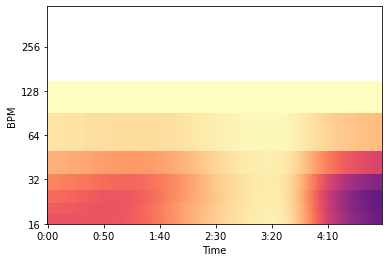

120.0


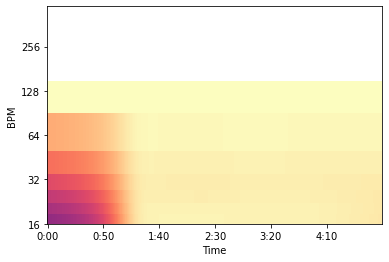

In [51]:
tempogram(AS_x)

60.0


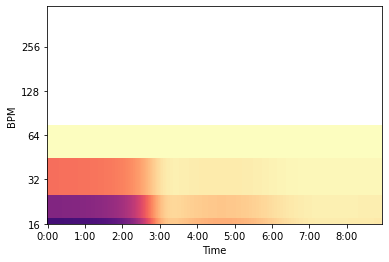

60.0


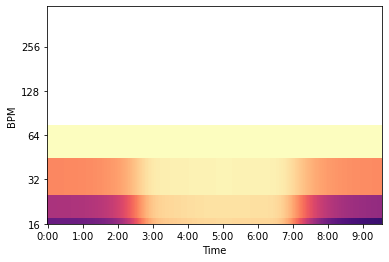

60.0


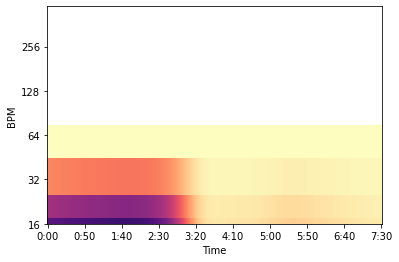

In [52]:
tempogram(MS_x)

60.0


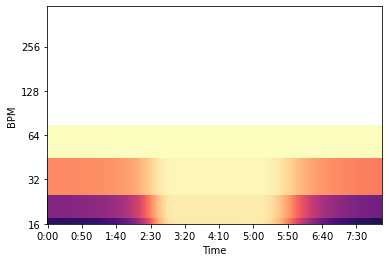

60.0


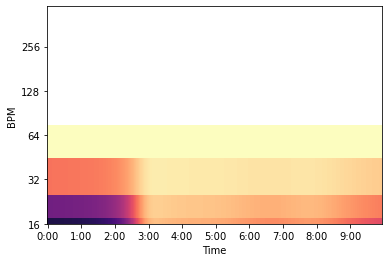

60.0


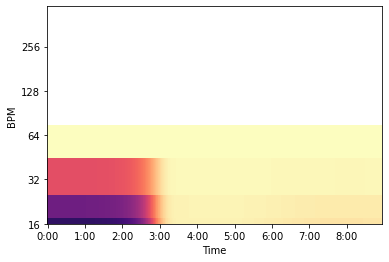

60.0


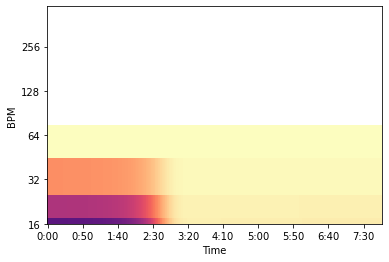

60.0


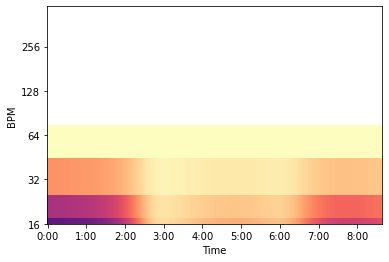

60.0


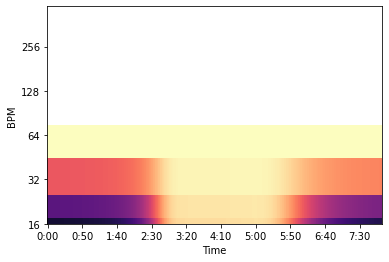

60.0


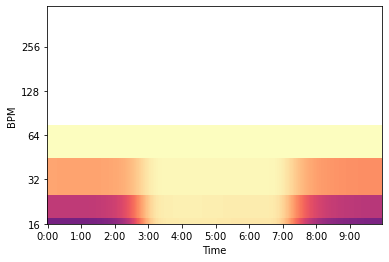

60.0


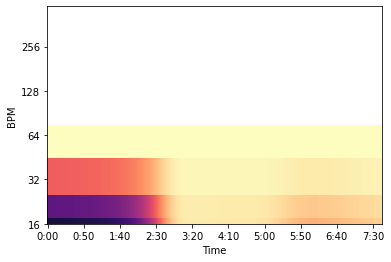

60.0


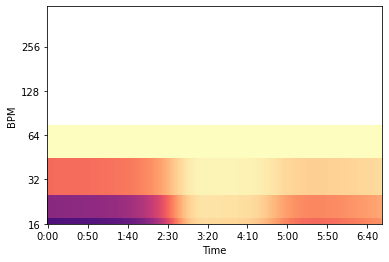

60.0


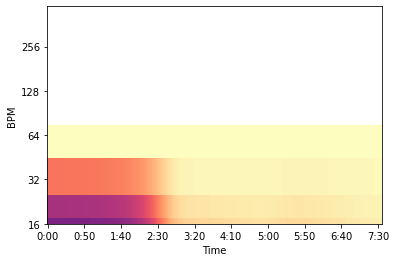

60.0


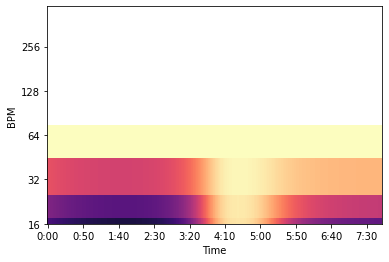

60.0


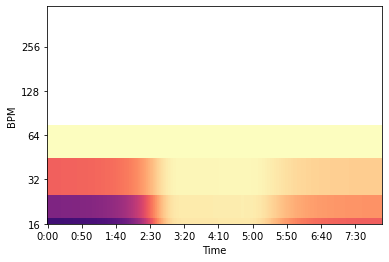

60.0


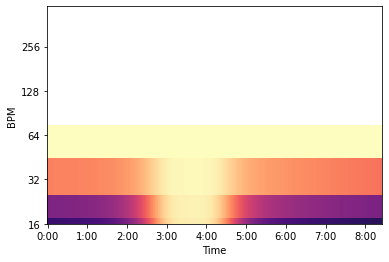

In [53]:
tempogram(MR_x)